# Inflation Framing Analysis: Guardian, Telegraph & BBC (2022–2023)

## 1. Introduction
- Brief description of goals & hypotheses (H1, H2, H3)
- Summary of corpus (`cleaned_articles_2022_2023.csv`)

## 2. Exploratory Data Analysis (EDA)
### 2.1 Load data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import calendar
from matplotlib.ticker import MaxNLocator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.models.phrases import Phrases, Phraser
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('data/cleaned_articles_2022_2023.csv')

df.head()

,Unnamed: 0.1,Unnamed: 0,Title,URL,Article_Text,Publication Date,Source,Sentiment Score,Year,Month,Article_Length
0,0,0,Bank of England governor says don't underestim...,https://www.bbc.co.uk/news/business-67474899,Andrew Bailey told MPs that Bank policymakers ...,2023-11-21,BBC,0.249234,2023,11,3813
1,1,1,Rishi Sunak: 'We've halved inflation' and othe...,https://www.bbc.co.uk/news/uk-politics-67475281,We've been looking at some of his claims. Rish...,2023-11-20,BBC,0.150736,2023,11,1898
2,2,2,Rachel Reeves: Labour would increase benefits ...,https://www.bbc.co.uk/news/uk-politics-67466971,"But before the champagne corks pop, everyone s...",2023-11-16,BBC,0.209527,2023,11,5023
3,3,3,What a falling inflation rate means for your f...,https://www.bbc.co.uk/news/business-67426526,When inflation started to accelerate early in ...,2023-11-15,BBC,0.396906,2023,11,3650
4,4,4,Why inflation is falling but prices are still ...,https://www.bbc.co.uk/news/business-64290160,The government had committed to better protect...,2023-11-15,BBC,0.250206,2023,11,3112


# Visualization Styling for Academic Paper

This notebook uses consistent styling across all visualizations to maintain a professional, publication-quality appearance throughout the paper. This includes:

- **Color Scheme**: Each media outlet has a consistent color representation:
 - BBC: Blue (#1f77b4)
 - Telegraph: Red (#d62728)
 - Guardian: Green (#2ca02c)

- **Formatting**: Consistent annotation styles, legends, and source citations across all figures

In [3]:
# Set up standardized visualization styling for the entire notebook
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator

# Make sure visualizations directory exists
os.makedirs('visualisations', exist_ok=True)

def setup_visualization_style():
    """Set up consistent styling for all visualizations in the notebook"""
    # Use seaborn's professional whitegrid style
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Set context for paper with larger font scale
    sns.set_context("paper", font_scale=1.3)
    
    # Set global matplotlib parameters for academic paper style
    plt.rcParams['figure.figsize'] = (12, 7)
    plt.rcParams['axes.titleweight'] = 'bold'
    plt.rcParams['font.family'] = 'serif'  # Academic style
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.3
    plt.rcParams['grid.color'] = 'gray'
    plt.rcParams['grid.linestyle'] = '--'
    plt.rcParams['savefig.dpi'] = 300  # High resolution for all saved figures
    
    # Define standard color palette for sources
    source_colors = {
        'BBC': '#1f77b4',      # Blue
        'Telegraph': '#d62728', # Red
        'Guardian': '#2ca02c'   # Green
    }
    
    # Return the source colors for use in plots
    return source_colors

# Fix the save_figure function to ensure it saves to the visualisations folder
def save_figure(fig, filename_base):
    """Save figure with standard parameters for publication"""
    # Create directory if needed
    os.makedirs('visualisations', exist_ok=True)
    
    # Ensure the path includes the visualisations directory
    if not filename_base.startswith('visualisations/'):
        filename_base = f'visualisations/{filename_base}'
        
    # Save in multiple formats at high resolution
    fig.savefig(f'{filename_base}.pdf', bbox_inches='tight')
    print(f"Saved {filename_base}.pdf visualisation")

def add_source_note(fig, additional_text=""):
    """Add standardized source note to figure"""
    base_text = 'Source: UK media dataset (N=2,804), 2022-2023'
    if additional_text:
        base_text += f"; {additional_text}"
    fig.text(0.01, 0.01, base_text, fontsize=8, color='dimgray')

def format_legend(ax, title="Media Outlet"):
    """Apply standard legend formatting"""
    legend = ax.legend(title=title, frameon=True, fontsize=11,
                      framealpha=0.9, edgecolor='lightgray')
    legend.get_title().set_fontweight('bold')
    return legend

def format_axes(ax, x_label="", y_label="", title=""):
    """Apply standard axis formatting"""
    if x_label:
        ax.set_xlabel(x_label, fontsize=13, labelpad=10)
    if y_label:
        ax.set_ylabel(y_label, fontsize=13, labelpad=10)
    if title:
        ax.set_title(title, fontsize=16, pad=15)
    
    # Format date axes if x-axis contains dates
    if isinstance(ax.get_xlim()[0], float) and ax.get_xlim()[0] > 700000:  # Matplotlib date format check
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        plt.xticks(rotation=45)
    
    return ax

# Initialize the standard style and colors for the notebook
source_colors = setup_visualization_style()

print("Visualization style setup complete - all plots will use consistent academic styling")

Visualization style setup complete - all plots will use consistent academic styling


## 2. Exploratory Data Analysis (EDA)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Count articles by source and year
source_year_counts = pd.crosstab(df['Source'], df['Year'])

# Calculate average word count by source - make sure these are correctly rounded
avg_word_counts = df.groupby('Source')['Article_Length'].mean().round(1)

# Calculate median word count by source
median_word_counts = df.groupby('Source')['Article_Length'].median().round(1)

# Calculate total articles by source
total_by_source = df.groupby('Source').size()

# Verify the average word counts are reasonable
print("Average word counts by source:")
print(avg_word_counts)

# Create a summary dataframe
summary_df = pd.DataFrame({
    '2022': source_year_counts[2022],
    '2023': source_year_counts[2023],
    'Total Articles': total_by_source,
    'Average Word Count': avg_word_counts,
    'Median Word Count': median_word_counts,
})

# Calculate total row correctly - use weighted average for word count
total_word_count = df['Article_Length'].sum()
total_articles = len(df)
overall_avg_word_count = (total_word_count / total_articles).round(1)

totals = pd.Series({
    '2022': source_year_counts[2022].sum(),
    '2023': source_year_counts[2023].sum(),
    'Total Articles': total_by_source.sum(),
    'Average Word Count': overall_avg_word_count,
    'Median Word Count': df['Article_Length'].median(),
}, name='Total')

# Double-check the overall average
print(f"Total word count: {total_word_count}")
print(f"Total articles: {total_articles}")
print(f"Overall average word count: {overall_avg_word_count}")

# Append total row to the summary dataframe
summary_df = pd.concat([summary_df, totals.to_frame().T])

# Display the table
print("Table 1: Distribution and Characteristics of Inflation-Related Articles by Source (2022-2023)")
print(summary_df)

# Create a PDF of the table
def save_df_as_pdf(df, filename, title=None):
    fig, ax = plt.subplots(figsize=(12, 3 + len(df) * 0.5))
    ax.axis('tight')
    ax.axis('off')
    
    # Create the table
    table = ax.table(
        cellText=[[str(val) if isinstance(val, (int, np.int64)) else f"{val:.1f}" if isinstance(val, (float, np.float64)) else val 
                  for val in row] for row in df.values],
        colLabels=df.columns,
        rowLabels=df.index,
        cellLoc='center',
        loc='center',
        bbox=[0, 0, 1, 1]
    )
    
    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)
    
    # Add title if provided
    if title:
        plt.suptitle(title, fontsize=14, y=0.95)
        plt.subplots_adjust(top=0.85)
    
    # Save as PDF
    pp = PdfPages(filename)
    pp.savefig(fig, bbox_inches='tight')
    pp.close()
    
    plt.close()
    print(f"Table saved as {filename}")

# Save the dataframe as PDF
save_df_as_pdf(
    summary_df, 
    'article_summary_table.pdf', 
    'Table 1: Distribution and Characteristics of Inflation-Related Articles by Source (2022-2023)'
)

# Save to CSV
summary_df.to_csv('article_summary_table.csv')

print("Summary table created and saved successfully!")

Average word counts by source:
Source
BBC          3387.2
Guardian     4086.0
Telegraph    4884.6
Name: Article_Length, dtype: float64
Total word count: 12088931
Total articles: 2804
Overall average word count: 4311.3
Table 1: Distribution and Characteristics of Inflation-Related Articles by Source (2022-2023)
             2022    2023  Total Articles  Average Word Count  \
BBC         126.0   107.0           233.0              3387.2   
Guardian    431.0  1145.0          1576.0              4086.0   
Telegraph   622.0   373.0           995.0              4884.6   
Total      1179.0  1625.0          2804.0              4311.3   

           Median Word Count  
BBC                   2961.0  
Guardian              3792.0  
Telegraph             4100.0  
Total                 3880.0  
Table saved as article_summary_table.pdf
Summary table created and saved successfully!



==== COMBINED INFLATION AND ARTICLE COUNT VISUALIZATION ====
Saved visualisations/inflation_article_count.pdf visualisation


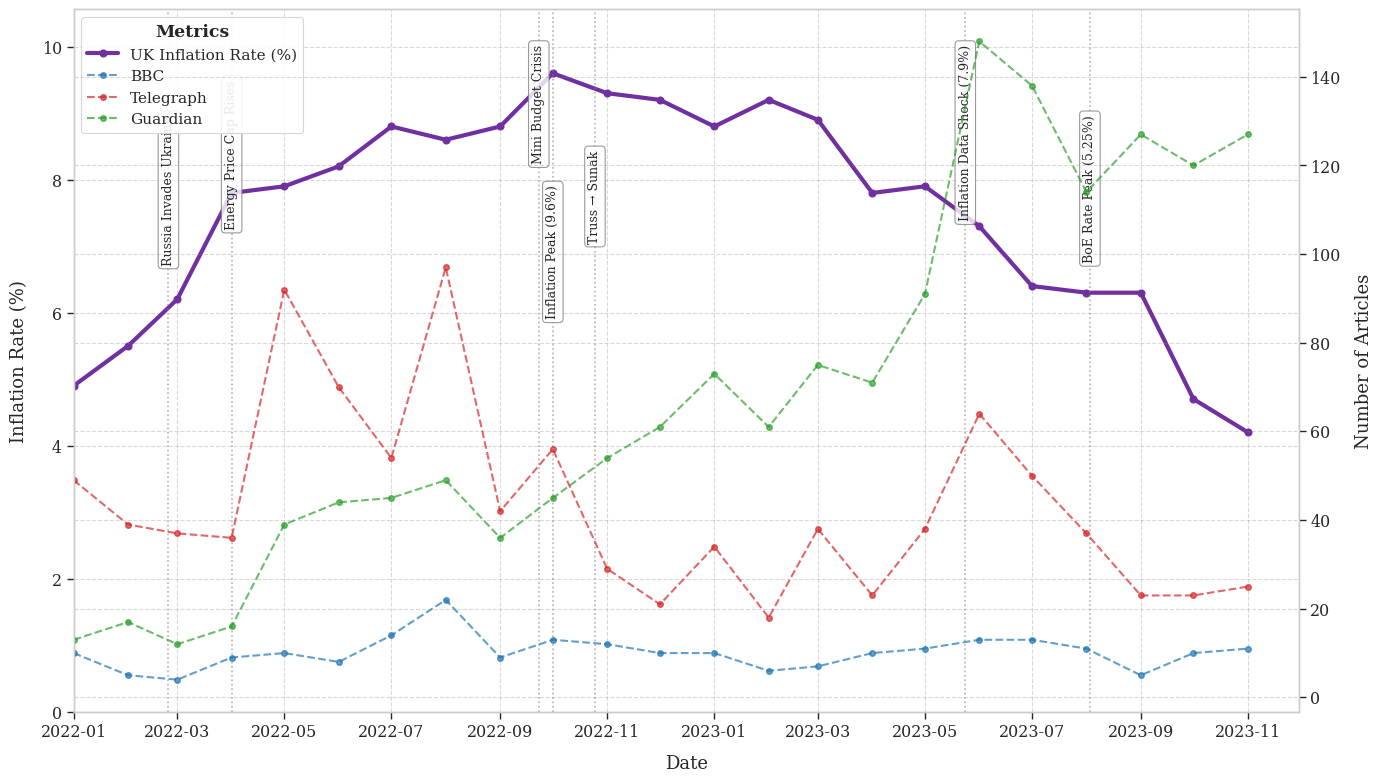

In [5]:
print("\n==== COMBINED INFLATION AND ARTICLE COUNT VISUALIZATION ====")

# Process the inflation data
lines = """
2022 JAN,4.9
2022 FEB,5.5
2022 MAR,6.2
2022 APR,7.8
2022 MAY,7.9
2022 JUN,8.2
2022 JUL,8.8
2022 AUG,8.6
2022 SEP,8.8
2022 OCT,9.6
2022 NOV,9.3
2022 DEC,9.2
2023 JAN,8.8
2023 FEB,9.2
2023 MAR,8.9
2023 APR,7.8
2023 MAY,7.9
2023 JUN,7.3
2023 JUL,6.4
2023 AUG,6.3
2023 SEP,6.3
2023 OCT,4.7
2023 NOV,4.2
"""

# Parse the inflation data
data_rows = []
for line in lines.strip().split('\n'):
    if line:
        try:
            date_str, rate_str = line.split(',')
            year = int(date_str.split()[0])
            month = date_str.split()[1]
            # Convert month name to month number
            month_num = {"JAN": 1, "FEB": 2, "MAR": 3, "APR": 4, "MAY": 5, "JUN": 6,
                         "JUL": 7, "AUG": 8, "SEP": 9, "OCT": 10, "NOV": 11, "DEC": 12}[month]
            rate = float(rate_str)
            data_rows.append({'Year': year, 'Month': month_num, 'Rate': rate})
        except:
            # Skip any problematic lines
            continue

inflation_df = pd.DataFrame(data_rows)

# Create a proper date column for inflation data
inflation_df['Date'] = pd.to_datetime(inflation_df[['Year', 'Month']].assign(day=1))

# Prepare article count data
# Ensure we have monthly counts by source
if 'monthly_counts' not in locals():
    monthly_counts = df.groupby(['Year', 'Month', 'Source']).size().reset_index(name='Count')
    monthly_counts['Date'] = pd.to_datetime(monthly_counts[['Year', 'Month']].assign(day=1))
    monthly_counts = monthly_counts.sort_values('Date')

# Create a dual-axis figure
fig, ax1 = plt.subplots(figsize=(14, 8))

# Format first axis using the standard function
format_axes(ax1, 
           x_label="Date", 
           y_label="Inflation Rate (%)")

# Plot inflation data
ax1.plot(inflation_df['Date'], inflation_df['Rate'], 
         color='#7030A0', linewidth=3, marker='o', 
         label='UK Inflation Rate (%)')

# Set y-axis limits for inflation
ax1.set_ylim(bottom=0)
ax1.set_ylim(top=max(inflation_df['Rate']) * 1.1)  # Give some headroom

# Second axis: Article counts (right y-axis)
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Articles', fontsize=13, labelpad=10)

# Plot article counts by source
for source in df['Source'].unique():
    source_data = monthly_counts[monthly_counts['Source'] == source]
    # Make sure dates are in datetime format and sorted
    source_data = source_data.sort_values('Date')
    ax2.plot(source_data['Date'], source_data['Count'], 
             marker='o', markersize=4,
             linewidth=1.5, linestyle='--', label=source, 
             color=source_colors[source], alpha=0.7)

# Set date range to match (Jan 2022 - Nov 2023)
ax1.set_xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2023-11-30'))

# Add annotations for key economic events
key_events = {
    '2022-02-24': 'Russia Invades Ukraine',
    '2022-04-01': 'Energy Price Cap Rises',
    '2022-09-23': 'Mini Budget Crisis',
    '2022-10-25': 'Truss → Sunak',
    '2022-10-01': 'Inflation Peak (9.6%)',
    '2023-05-24': 'Inflation Data Shock (7.9%)',
    '2023-08-03': 'BoE Rate Peak (5.25%)'
}

# Define varying y-positions to prevent overlap
y_positions = {
    'Russia Invades Ukraine': 0.85,
    'Energy Price Cap Rises': 0.90,
    'Mini Budget Crisis': 0.95,
    'Truss → Sunak': 0.80,
    'Inflation Peak (9.6%)': 0.75,
    'Inflation Data Shock (7.9%)': 0.95,
    'BoE Rate Peak (5.25%)': 0.85
}

# Add event annotations
for date_str, label in key_events.items():
    date = pd.to_datetime(date_str)
    ax1.axvline(x=date, color='gray', linestyle=':', alpha=0.6)
    # Position label with varying heights
    y_pos = ax1.get_ylim()[1] * y_positions[label]
    ax1.annotate(label, xy=(date, y_pos), xytext=(0, 0), 
                textcoords="offset points", rotation=90, 
                fontsize=9, ha='center', va='top',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# Create a custom legend with all items
combined_legend = ax1.legend(lines1 + lines2, labels1 + labels2, 
                             loc='upper left', title="Metrics", 
                             frameon=True, fontsize=11, 
                             framealpha=0.9, edgecolor='lightgray')
combined_legend.get_title().set_fontweight('bold')
# Adjust layout
plt.tight_layout()

# Save the figure using the standard function
save_figure(fig, "inflation_article_count")

Saved visualisations/avg_word_count_by_source.pdf visualisation


/var/folders/tz/m04h080x4rgdtp4hkk46mfq40000gn/T/ipykernel_6383/1427329682.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


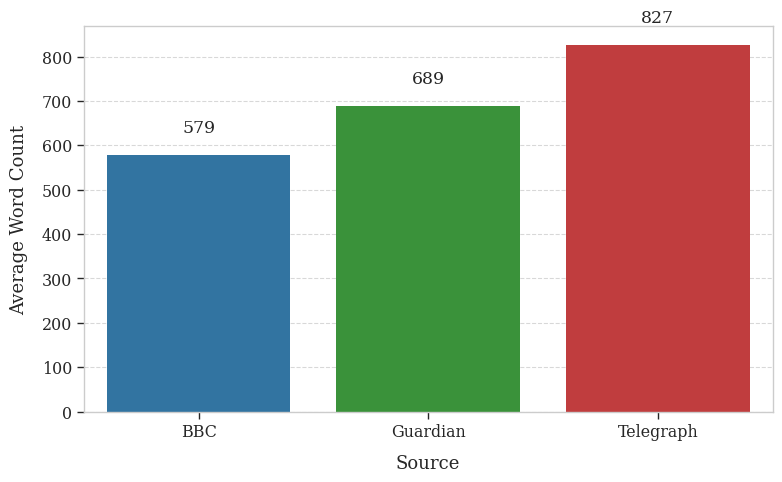

In [6]:
#------------------------------
# 3. ARTICLE LENGTH BY SOURCE
#------------------------------

# Calculate article length 
if 'Article_Length' not in df.columns:
    df['Article_Length'] = df['Article_Text'].str.len()

if 'Word_Count' not in df.columns:
    df['Word_Count'] = df['Article_Text'].apply(lambda x: len(str(x).split()))

# Calculate article length statistics by source
length_stats = df.groupby('Source').agg({
    'Article_Length': ['mean', 'median', 'min', 'max', 'count'],
    'Word_Count': ['mean', 'median', 'min', 'max']
})

# Format for readability
length_stats_formatted = pd.DataFrame({
    'Number of Articles': length_stats[('Article_Length', 'count')],
    'Average Length (chars)': length_stats[('Article_Length', 'mean')].round(0).astype(int),
    'Average Word Count': length_stats[('Word_Count', 'mean')].round(0).astype(int),
    'Median Word Count': length_stats[('Word_Count', 'median')].round(0).astype(int),
    'Min Word Count': length_stats[('Word_Count', 'min')].round(0).astype(int),
    'Max Word Count': length_stats[('Word_Count', 'max')].round(0).astype(int)
})

# Create figure with standardized styling
fig = plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=length_stats_formatted.index,
    y=length_stats_formatted['Average Word Count'],
    palette=[source_colors['BBC'], source_colors['Guardian'], source_colors['Telegraph']]
)

# Add value labels on top of bars
for i, v in enumerate(length_stats_formatted['Average Word Count']):
    ax.text(i, v + 50, str(v), ha='center')

# Format axes using your standardized function
format_axes(ax, 
           x_label="Source", 
           y_label="Average Word Count")

# Adjust layout
plt.tight_layout()

# Save using your standardized function
save_figure(fig, "avg_word_count_by_source")

Year       2022  2023  Total
BBC         126   107    233
Guardian    431  1145   1576
Telegraph   622   373    995
Total      1179  1625   2804


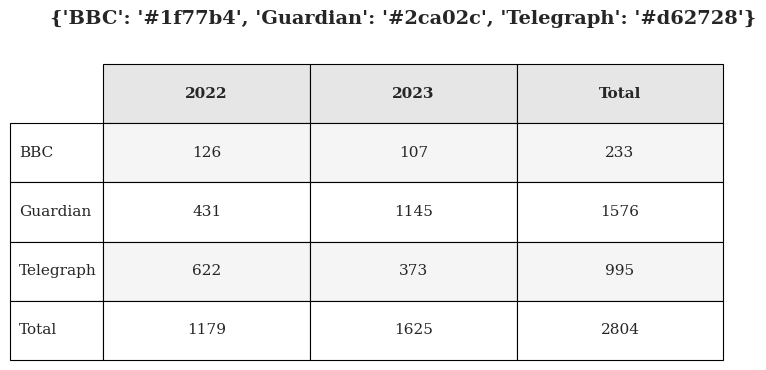

In [30]:
#------------------------------
# 4. ARTICLE COUNT TABLE BY SOURCE AND YEAR - SIMPLE STYLE WITH COLORED SOURCE NAMES
#------------------------------

# Define source colors (using the same colors as in your bar chart)
source_colors = {
    'BBC': '#1f77b4',       # Blue color for BBC
    'Guardian': '#2ca02c',  # Green color for Guardian
    'Telegraph': '#d62728'  # Red color for Telegraph
}

# Create a crosstab of article counts by source and year
article_counts = pd.crosstab(df['Source'], df['Year'])

# Add a total column
article_counts['Total'] = article_counts.sum(axis=1)

# Calculate column totals
year_totals = article_counts.sum().to_frame().T
year_totals.index = ['Total']

# Combine with the main table
article_counts_with_totals = pd.concat([article_counts, year_totals])

# Display the table
print(article_counts_with_totals)

# Create a clean, simple table image with colored source names
def create_simple_table_colored_sources(df, filename, title=None, source_colors=None):
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.axis('off')
    
    # Convert dataframe to list format for table
    cell_text = df.values
    row_labels = df.index
    col_labels = df.columns
    
    # Create the table
    table = ax.table(
        cellText=cell_text,
        rowLabels=row_labels,
        colLabels=col_labels,
        cellLoc='center',
        loc='center',
        bbox=[0, 0, 1, 1]
    )
    
    # Style the table - simple clean style
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)
    
    # Set clean alternating row colors
    for i in range(len(row_labels) + 1):
        for j in range(len(col_labels)):
            # Header row
            if i == 0:
                table[(i, j)].set_facecolor('#e6e6e6')  # Light gray header
                table[(i, j)].set_text_props(fontweight='bold')
            # Even rows - white
            elif i % 2 == 0:
                table[(i, j)].set_facecolor('white')
            # Odd rows - very light gray
            else:
                table[(i, j)].set_facecolor('#f5f5f5')  # Very light gray
    
    # Color only the source names in the row labels
    if source_colors:
        for i, source in enumerate(row_labels):
            if source in source_colors:
                # Only color the text in the row label cell, not the background
                table[(i+1, -1)].set_text_props(color=source_colors[source], fontweight='bold')
    
    # Add simple borders
    table.set_fontsize(11)
    
    # Add title if provided
    if title:
        plt.figtext(0.5, 0.95, title, ha='center', fontsize=14, fontweight='bold')
        plt.subplots_adjust(top=0.85)
# Also save as PDF
create_simple_table_colored_sources(
    article_counts_with_totals, 
    'Visualisations/article_counts_colored_sources_table.pdf',
    source_colors
)


==== TOP WORDS BY SOURCE VISUALIZATION ====


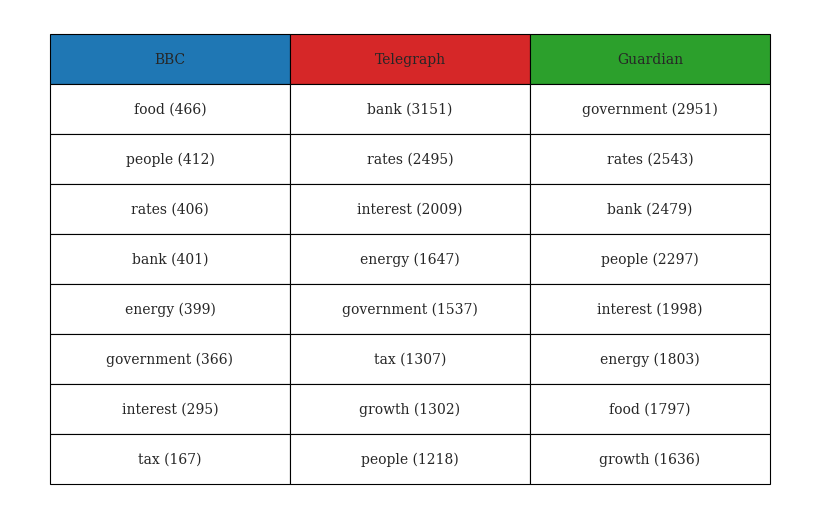

In [7]:
#------------------------------
# 4. TOP 8 WORDS BY SOURCE
#------------------------------

import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

print("\n==== TOP WORDS BY SOURCE VISUALIZATION ====")

# Define stopwords to exclude
stopwords = set([
    'the', 'and', 'to', 'of', 'a', 'in', 'for', 'is', 'on', 'that', 'by', 'this',
    'with', 'it', 'are', 'as', 'was', 'but', 'be', 'at', 'from', 'has', 'have',
    'had', 'an', 'will', 'they', 'their', 'not', 'which', 'or', 'we', 'you', 
    'one', 'all', 'would', 'there', 'been', 'if', 'more', 'when', 'who', 'what',
    'also', 'said', 'its', 'into', 'than', 'other', 'can', 'only', 'about', 'may',
    'some', 'could', 'should', 'his', 'her', 'our', 'up', 'were', 'out', 'then',
    'time', 'them', 'just', 'such', 'how', 'these', 'any', 'two', 'per', 'cent',
    'now', 'over', 'like', 'even', 'those', 'after', 'first', 'new', 'many',
    'year', 'years', 'last', 'month', 'months', 'week', 'weeks', 'day', 'days',
    'inflation', 'prices', 'high', 'low', 'rise', 'fall', 'increase', 'decrease', 
    'rate', 'cost', 'price', 'costs', 'pay', 'higher', 'while', 'she', 'since', 
    'england', 'rises', 'down', 'rising', 'economy', 'says', 'living', 'figures', 'much', 'expected', 'less', 'still'
])

# Text preprocessing function
def preprocess_for_word_count(text):
    if not isinstance(text, str):
        return []
    
    # Lowercase and remove punctuation
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    
    # Split into tokens, remove stopwords and short words
    tokens = [word for word in text.split() if word not in stopwords and len(word) > 2]
    
    return tokens

# Process text and count words by source
source_words = {}
for source in df['Source'].unique():
    # Combine all text from this source
    source_text = ' '.join(df[df['Source'] == source]['Article_Text'].fillna(''))
    
    # Process and count words
    tokens = preprocess_for_word_count(source_text)
    word_counts = Counter(tokens)
    top_words = word_counts.most_common(8)
    source_words[source] = top_words

# Create a DataFrame for the top words
top_words_df = pd.DataFrame(index=range(8), columns=df['Source'].unique())
for source, words in source_words.items():
    top_words_df[source] = [f"{word} ({count})" for word, count in words]

# Create figure with minimal dimensions - just enough for the table
fig = plt.figure(figsize=(8, 5))  # Reduced height significantly
ax = plt.subplot(111)
ax.axis('off')

# Set figure background to transparent
fig.patch.set_alpha(0.0)

# Use the standard source colors for column headers
col_colors = [source_colors.get(source, '#EEEEEE') for source in top_words_df.columns]

# Create table with the data - adjust the table to fill most of the space
table = ax.table(
    cellText=top_words_df.values,
    colLabels=top_words_df.columns,
    cellLoc='center',
    loc='center',
    colColours=col_colors,
    bbox=[0.05, 0.05, 0.9, 0.9]  # Table fills 90% of the figure area
)

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)  # Slightly smaller font to fit better
table.scale(1, 1.2)  # Slightly reduced row height for less vertical space

# Eliminated title and other elements that add space

# Set extremely tight layout with minimal padding
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # No margins at all

# Save the figure with minimal padding and tight bounding box
plt.savefig("visualisations/top_words_by_source.pdf", 
           bbox_inches='tight', 
           pad_inches=0.05,  # Minimal padding
           transparent=True)  # Transparent background

## Sentiment Analysis

In [8]:
# First, make sure the required imports are present
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm.notebook import tqdm
from scipy import stats
import gc

# Set up device
mps_available = hasattr(torch.backends, "mps") and torch.backends.mps.is_available()
device = torch.device("mps") if mps_available else torch.device("cpu")
print(f"Using device: {device}")

# Load FinBERT
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")
model.to(device)

# Define the sentiment analysis function with improved error handling
def analyze_sentiment_batched(texts, max_length=512, batch_size=16):
    results = []
    
    # Process in batches
    for i in tqdm(range(0, len(texts), batch_size)):
        try:
            batch_texts = texts[i:i+batch_size]
            
            # Tokenize
            encoded = tokenizer(batch_texts, 
                              padding=True, 
                              truncation=True, 
                              max_length=max_length, 
                              return_tensors="pt")
            
            # Move to device
            encoded = {k: v.to(device) for k, v in encoded.items()}
            
            # Inference
            with torch.no_grad():
                outputs = model(**encoded)
                predictions = torch.nn.functional.softmax(outputs.logits, dim=1)
                predictions = predictions.cpu().numpy()
            
            # Improved compound score calculation
            for j, pred in enumerate(predictions):
                # Normalize to range between -1 and 1 (more like VADER)
                compound = (pred[2] - pred[0]) / (pred[0] + pred[1] + pred[2])
                results.append({
                    'negative': float(pred[0]),
                    'neutral': float(pred[1]),
                    'positive': float(pred[2]),
                    'compound': float(compound)
                })
                
            # Memory management for long runs
            if i % (batch_size * 10) == 0:
                gc.collect()
                if torch.cuda.is_available():
                    torch.cuda.empty_cache()
                    
        except Exception as e:
            print(f"Error processing batch {i}: {e}")
            # Add placeholder results to maintain alignment
            for _ in range(min(batch_size, len(texts) - i)):
                results.append({
                    'negative': float('nan'),
                    'neutral': float('nan'),
                    'positive': float('nan'),
                    'compound': float('nan')
                })
    
    return results

# Main analysis
# 1. Preprocess without arbitrary truncation
df['Analysis_Text'] = df['Article_Text'].fillna("").astype(str)

# 2. Run analysis
print(f"Running FinBERT sentiment analysis on {len(df)} articles...")
sentiments = analyze_sentiment_batched(df['Analysis_Text'].tolist(), batch_size=16)

# 3. Add to dataframe with proper error handling
if len(sentiments) == len(df):
    df['finbert'] = sentiments
    df['finbert_compound'] = df['finbert'].apply(lambda x: x['compound'])
    df['finbert_positive'] = df['finbert'].apply(lambda x: x['positive'])
    df['finbert_negative'] = df['finbert'].apply(lambda x: x['negative'])
    df['finbert_neutral'] = df['finbert'].apply(lambda x: x['neutral'])
    
    # Statistical testing
    sources = df['Source'].unique()
    anova_data = [df[df['Source'] == source]['finbert_compound'] for source in sources]
    f_stat, p_val = stats.f_oneway(*anova_data)
    print(f"ANOVA results for sentiment differences: F={f_stat:.4f}, p={p_val:.4f}")
    
    # Save results
    df[['Source', 'Publication Date', 'Title', 'finbert_compound', 
        'finbert_positive', 'finbert_negative', 'finbert_neutral']].to_csv(
        'sentiment_results_finbert.csv', index=False)
    
    print("FinBERT analysis complete!")
else:
    print(f"ERROR: Number of sentiment results ({len(sentiments)}) doesn't match number of articles ({len(df)})")

Using device: mps


/opt/anaconda3/envs/ds202/lib/python3.9/site-packages/huggingface_hub-0.29.2-py3.8.egg/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
/opt/anaconda3/envs/ds202/lib/python3.9/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
/opt/anaconda3/envs/ds202/lib/python3.9/site-packages/transformers/modeling_utils.py:488: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models

Running FinBERT sentiment analysis on 2804 articles...


  0%|          | 0/176 [00:00<?, ?it/s]

ANOVA results for sentiment differences: F=8.8749, p=0.0001
FinBERT analysis complete!


/var/folders/tz/m04h080x4rgdtp4hkk46mfq40000gn/T/ipykernel_6383/2559770530.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment = df.groupby(['Source', pd.Grouper(key='Publication Date', freq='M')])['finbert_compound'].mean().reset_index()


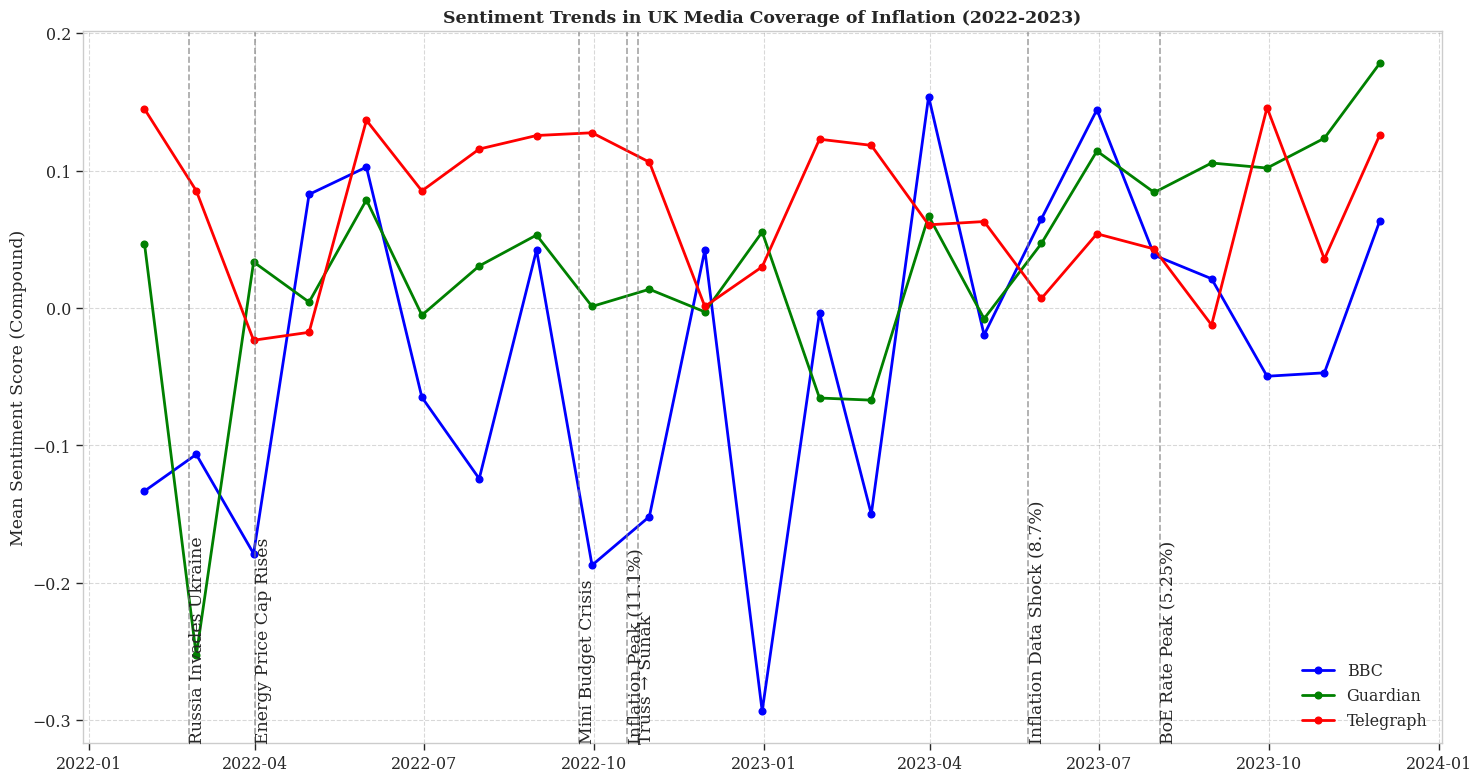

In [9]:
# Prepare data
df['Publication Date'] = pd.to_datetime(df['Publication Date'])

# Key economic events to mark
key_events = {
    '2022-02-24': 'Russia Invades Ukraine',
    '2022-04-01': 'Energy Price Cap Rises',
    '2022-09-23': 'Mini Budget Crisis',
    '2022-10-25': 'Truss → Sunak',
    '2022-10-19': 'Inflation Peak (11.1%)',
    '2023-05-24': 'Inflation Data Shock (8.7%)',
    '2023-08-03': 'BoE Rate Peak (5.25%)'
}

# Aggregate by month for cleaner visualization
monthly_sentiment = df.groupby(['Source', pd.Grouper(key='Publication Date', freq='M')])['finbert_compound'].mean().reset_index()

# Create the plot
plt.figure(figsize=(15, 8))

# Plot sentiment lines
for source, color in zip(['BBC', 'Guardian', 'Telegraph'], ['blue', 'green', 'red']):
    source_data = monthly_sentiment[monthly_sentiment['Source'] == source]
    plt.plot(source_data['Publication Date'], source_data['finbert_compound'], 
             marker='o', label=source, color=color, linewidth=2)

# Add event markers
for date, event in key_events.items():
    plt.axvline(x=pd.to_datetime(date), color='gray', linestyle='--', alpha=0.7)
    plt.text(pd.to_datetime(date), plt.ylim()[0], event, rotation=90, va='bottom')

plt.title('Sentiment Trends in UK Media Coverage of Inflation (2022-2023)')
plt.ylabel('Mean Sentiment Score (Compound)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
      Source  count      mean       std    median       min       max
0        BBC    233 -0.021335  0.327627  0.006209 -0.923520  0.854406
1   Guardian   1576  0.062340  0.348657  0.024645 -0.934824  0.913130
2  Telegraph    995  0.081011  0.310383  0.030722 -0.926223  0.880034

ANOVA Test for Sentiment Differences:
F-statistic: 8.8749, p-value: 0.0001

Tukey HSD Post-hoc Test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1    group2  meandiff p-adj  lower  upper  reject
-------------------------------------------------------
     BBC  Guardian   0.0837 0.0011 0.0287 0.1386   True
     BBC Telegraph   0.1023 0.0001 0.0454 0.1593   True
Guardian Teleg

/var/folders/tz/m04h080x4rgdtp4hkk46mfq40000gn/T/ipykernel_6383/1644742749.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Source', y='finbert_compound', data=df,
/var/folders/tz/m04h080x4rgdtp4hkk46mfq40000gn/T/ipykernel_6383/1644742749.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Source', y='finbert_compound', data=df,
/var/folders/tz/m04h080x4rgdtp4hkk46mfq40000gn/T/ipykernel_6383/1644742749.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Source', y='finbert_compound', data=df,


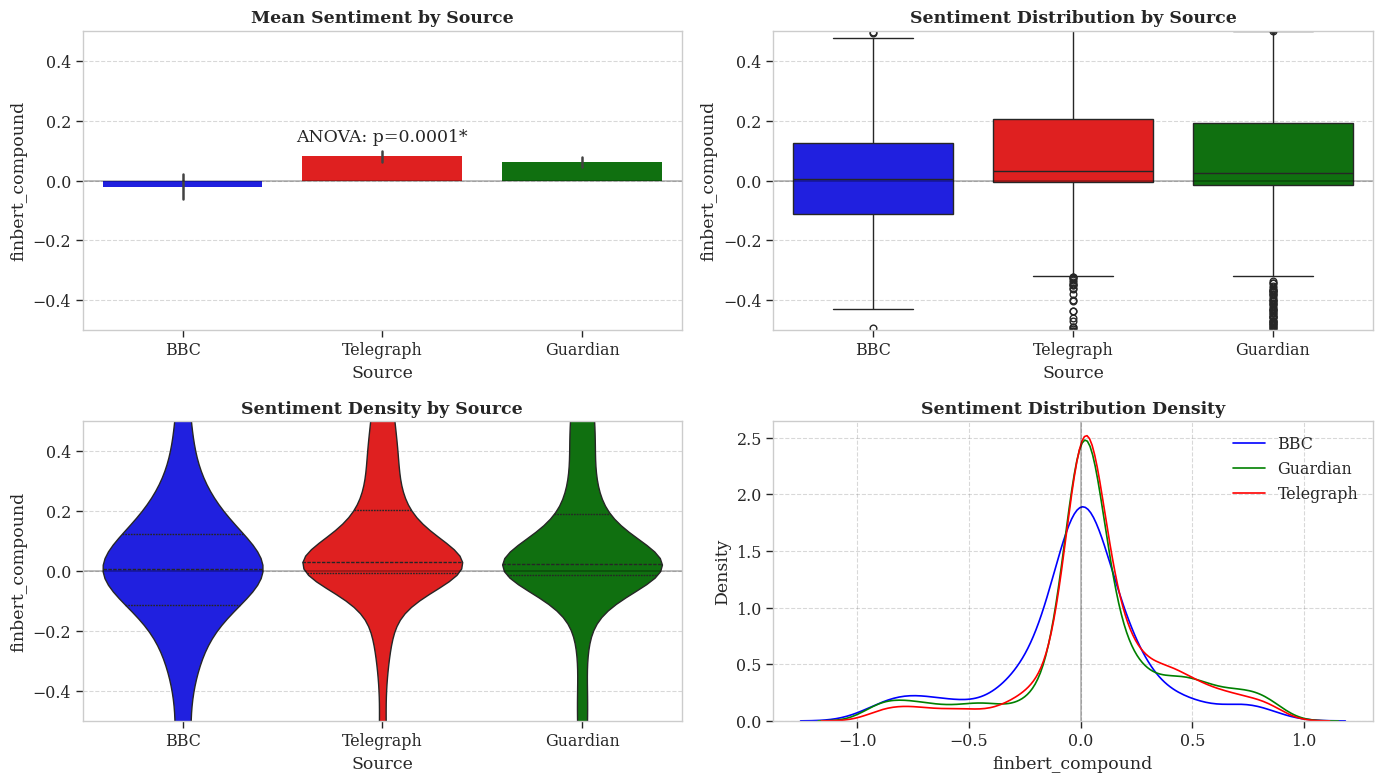

In [10]:
# Statistical comparison of sentiment across sources
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 1A. Summary statistics by source
sentiment_summary = df.groupby('Source')['finbert_compound'].agg(['count', 'mean', 'std', 'median', 'min', 'max']).reset_index()
print(sentiment_summary)

# 1B. ANOVA with post-hoc Tukey tests
print("\nANOVA Test for Sentiment Differences:")
sources = df['Source'].unique()
anova_data = [df[df['Source'] == source]['finbert_compound'] for source in sources]
f_stat, p_val = stats.f_oneway(*anova_data)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    # Run post-hoc tests to see which specific pairs of sources differ
    tukey = pairwise_tukeyhsd(df['finbert_compound'], df['Source'], alpha=0.05)
    print("\nTukey HSD Post-hoc Test:")
    print(tukey)
    
    # Convert Tukey results to DataFrame for easier interpretation
    tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], 
                           columns=tukey._results_table.data[0])
    print(tukey_df)

# 1C. Comprehensive visualization comparing sentiment distributions
plt.figure(figsize=(14, 8))

# Plot 1: Bar chart with error bars showing mean sentiment
plt.subplot(2, 2, 1)
sns.barplot(x='Source', y='finbert_compound', data=df, 
            palette={'BBC': 'blue', 'Guardian': 'green', 'Telegraph': 'red'})
plt.title('Mean Sentiment by Source')
plt.ylim(-0.5, 0.5)  # Adjust based on your data
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Add statistical significance markers if applicable
if p_val < 0.05:
    # Get the y-position for annotations
    y_pos = df.groupby('Source')['finbert_compound'].mean().max() + 0.05
    plt.text(1, y_pos, f"ANOVA: p={p_val:.4f}*", ha='center')

# Plot 2: Box plot showing distribution
plt.subplot(2, 2, 2)
sns.boxplot(x='Source', y='finbert_compound', data=df,
           palette={'BBC': 'blue', 'Guardian': 'green', 'Telegraph': 'red'})
plt.title('Sentiment Distribution by Source')
plt.ylim(-0.5, 0.5)  # Adjust based on your data
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Plot 3: Violin plot for deeper distribution view
plt.subplot(2, 2, 3)
sns.violinplot(x='Source', y='finbert_compound', data=df, 
              palette={'BBC': 'blue', 'Guardian': 'green', 'Telegraph': 'red'},
              inner='quartile')
plt.title('Sentiment Density by Source')
plt.ylim(-0.5, 0.5)  # Adjust based on your data
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Plot 4: KDE of sentiment distribution 
plt.subplot(2, 2, 4)
for source, color in zip(['BBC', 'Guardian', 'Telegraph'], ['blue', 'green', 'red']):
    source_data = df[df['Source'] == source]['finbert_compound']
    sns.kdeplot(source_data, label=source, color=color)
plt.title('Sentiment Distribution Density')
plt.legend()
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.savefig('sentiment_comparison_comprehensive.pdf', dpi=300)
plt.show()
plt.close()

/var/folders/tz/m04h080x4rgdtp4hkk46mfq40000gn/T/ipykernel_6383/1385446275.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment = df.groupby(['Source', pd.Grouper(key='Publication Date', freq='M')])['finbert_compound'].agg(


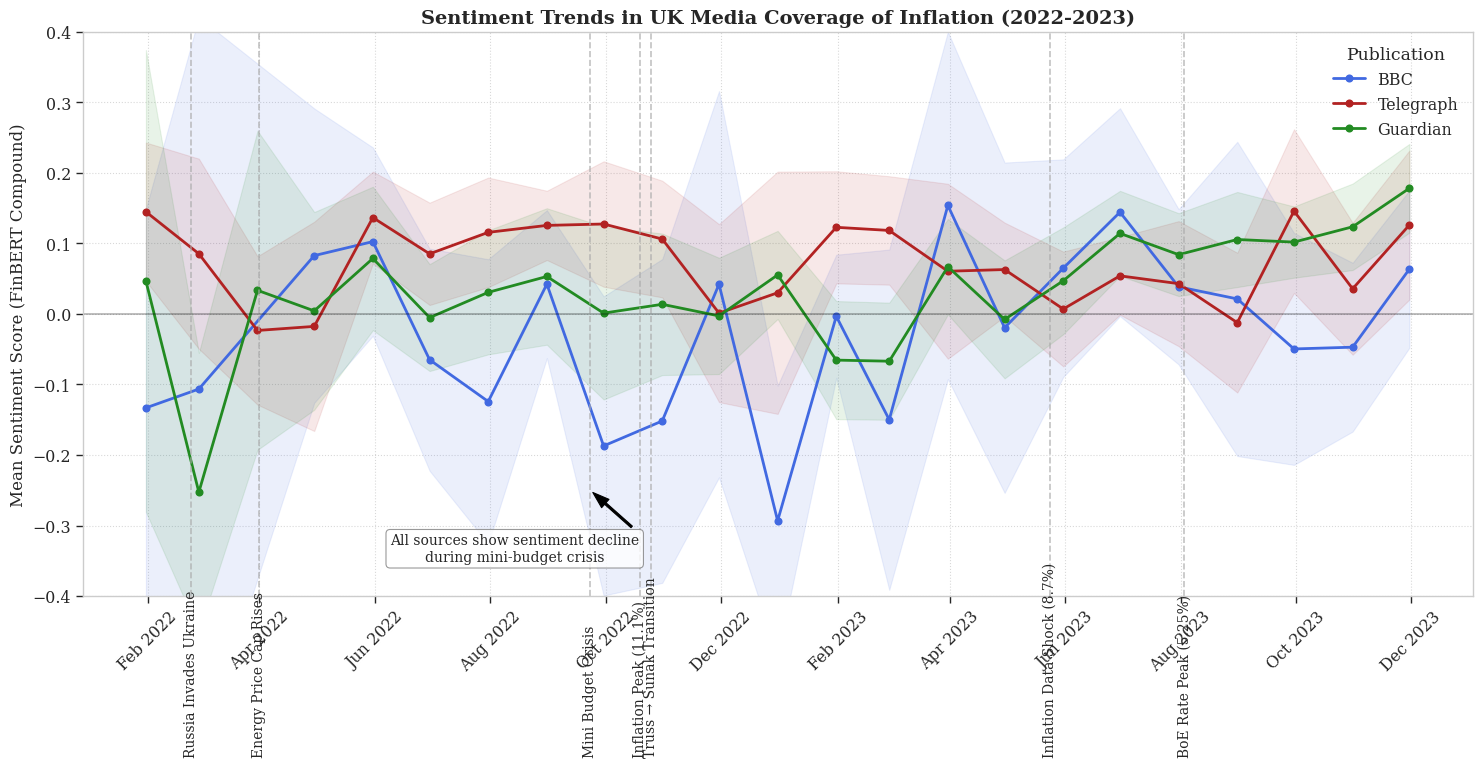

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

# Set consistent colors for each source
source_colors = {'BBC': 'royalblue', 'Guardian': 'forestgreen', 'Telegraph': 'firebrick'}

# Define key events for the timeline
key_events = {
    '2022-02-24': 'Russia Invades Ukraine',
    '2022-04-01': 'Energy Price Cap Rises',
    '2022-09-23': 'Mini Budget Crisis',
    '2022-10-25': 'Truss → Sunak Transition',
    '2022-10-19': 'Inflation Peak (11.1%)',
    '2023-05-24': 'Inflation Data Shock (8.7%)',
    '2023-08-03': 'BoE Rate Peak (5.25%)'
}

# Ensure Publication Date is in datetime format
df['Publication Date'] = pd.to_datetime(df['Publication Date'])

# Aggregate sentiment by month for each source
monthly_sentiment = df.groupby(['Source', pd.Grouper(key='Publication Date', freq='M')])['finbert_compound'].agg(
    ['mean', 'count', 'std']).reset_index()

# Create the time series plot
plt.figure(figsize=(15, 8))

# Plot sentiment lines for each source
for source in df['Source'].unique():
    source_data = monthly_sentiment[monthly_sentiment['Source'] == source]
    
    # Filter for months with sufficient data (at least 5 articles)
    valid_data = source_data[source_data['count'] >= 5]
    
    plt.plot(valid_data['Publication Date'], valid_data['mean'], 
             marker='o', label=source, color=source_colors[source], linewidth=2)
    
    # Add shaded confidence intervals
    plt.fill_between(valid_data['Publication Date'], 
                    valid_data['mean'] - (1.96 * valid_data['std'] / np.sqrt(valid_data['count'])),
                    valid_data['mean'] + (1.96 * valid_data['std'] / np.sqrt(valid_data['count'])),
                    color=source_colors[source], alpha=0.1)

# Add vertical lines for key events
for date, event in key_events.items():
    event_date = pd.to_datetime(date)
    plt.axvline(x=event_date, color='darkgray', linestyle='--', alpha=0.7)
    
    # Add rotated text labels
    y_pos = plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.05  # Position near bottom
    plt.text(event_date, y_pos, event, rotation=90, 
             verticalalignment='bottom', horizontalalignment='center', fontsize=10)

# Add neutral sentiment line
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Format x-axis to show readable dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)

# Add grid for readability
plt.grid(True, alpha=0.3, linestyle=':')

# Set labels and title
plt.title('Sentiment Trends in UK Media Coverage of Inflation (2022-2023)', fontsize=14)
plt.ylabel('Mean Sentiment Score (FinBERT Compound)', fontsize=12)
plt.xlabel('', fontsize=12)  # Empty xlabel since the dates are self-explanatory

# Add a legend with a shadow effect for better visibility
legend = plt.legend(title='Publication', loc='upper right', framealpha=0.9, 
                    edgecolor='black', shadow=True)

# Set y-axis limits to focus on the relevant range
plt.ylim(-0.4, 0.4)  # Adjust based on your actual data range

# Optional: Add an annotation box highlighting a key finding
# For example, highlighting mini-budget crisis sentiment drop:
mini_budget_date = pd.to_datetime('2022-09-23')
plt.annotate('All sources show sentiment decline\nduring mini-budget crisis',
             xy=(mini_budget_date, -0.25), xytext=(mini_budget_date - pd.Timedelta(days=40), -0.35),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             fontsize=10, ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Save high-resolution visualization
plt.tight_layout()
plt.savefig('sentiment_timeline.pdf', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [12]:
# Test for significant sentiment changes before/after key events
for event_date, event_name in key_events.items():
    print(f"\nEvent: {event_name}")
    for source in df['Source'].unique():
        # Extract sentiment before/after the event
        before = df[(df['Source'] == source) & 
                    (df['Publication Date'] < pd.to_datetime(event_date)) &
                    (df['Publication Date'] >= pd.to_datetime(event_date) - pd.Timedelta(days=14))]['finbert_compound']
        after = df[(df['Source'] == source) &
                  (df['Publication Date'] >= pd.to_datetime(event_date)) &
                  (df['Publication Date'] < pd.to_datetime(event_date) + pd.Timedelta(days=14))]['finbert_compound']
        
        # Run t-test
        t_stat, p_val = stats.ttest_ind(before, after)
        print(f"{source}: Before={before.mean():.3f}, After={after.mean():.3f}, Change={after.mean()-before.mean():.3f}, p={p_val:.4f}")


Event: Russia Invades Ukraine
BBC: Before=0.357, After=nan, Change=nan, p=nan
Telegraph: Before=0.081, After=-0.057, Change=-0.138, p=0.3365
Guardian: Before=-0.313, After=-0.717, Change=-0.403, p=0.3949

Event: Energy Price Cap Rises
BBC: Before=-0.126, After=-0.029, Change=0.097, p=0.5554
Telegraph: Before=-0.032, After=0.006, Change=0.038, p=0.7521
Guardian: Before=-0.049, After=0.001, Change=0.050, p=0.8192

Event: Mini Budget Crisis
BBC: Before=-0.109, After=0.077, Change=0.186, p=0.1820
Telegraph: Before=0.018, After=0.082, Change=0.064, p=0.4358
Guardian: Before=-0.083, After=-0.083, Change=-0.000, p=1.0000

Event: Truss → Sunak Transition
BBC: Before=-0.241, After=-0.394, Change=-0.153, p=0.6243
Telegraph: Before=0.099, After=0.020, Change=-0.079, p=0.4481
Guardian: Before=0.029, After=0.014, Change=-0.015, p=0.8749

Event: Inflation Peak (11.1%)
BBC: Before=-0.028, After=-0.358, Change=-0.330, p=0.2658
Telegraph: Before=0.164, After=0.074, Change=-0.090, p=0.3234
Guardian: Be

In [13]:
# Analyze sentiment specifically around key terms
key_terms = ['cost of living', 'interest rate', 'government', 'bank of england']

for term in key_terms:
    print(f"\nTerm: {term}")
    for source in df['Source'].unique():
        # Find articles mentioning the term
        term_articles = df[(df['Source'] == source) & 
                          (df['Article_Text'].str.contains(term, case=False, na=False))]
        
        # Calculate mean sentiment
        mean_sentiment = term_articles['finbert_compound'].mean()
        print(f"{source}: n={len(term_articles)}, Mean={mean_sentiment:.3f}")


Term: cost of living
BBC: n=83, Mean=-0.056
Telegraph: n=296, Mean=0.099
Guardian: n=607, Mean=0.028

Term: interest rate
BBC: n=107, Mean=-0.066
Telegraph: n=539, Mean=0.066
Guardian: n=640, Mean=0.005

Term: government
BBC: n=137, Mean=0.012
Telegraph: n=559, Mean=0.111
Guardian: n=946, Mean=0.099

Term: bank of england
BBC: n=87, Mean=-0.026
Telegraph: n=501, Mean=0.051
Guardian: n=480, Mean=0.019


In [14]:
# Calculate correlation between topic prevalence and sentiment for each source
for source in df['Source'].unique():
    source_df = df[df['Source'] == source]
    for topic in topic_cols:
        corr, p_val = stats.pearsonr(source_df[topic], source_df['finbert_compound'])
        print(f"{source}, {topic}: r={corr:.3f}, p={p_val:.4f}")

NameError: name 'topic_cols' is not defined

Topic Modelling

[nltk_data] Downloading package stopwords to /Users/maxwellfilip-
[nltk_data]     turner/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/maxwellfilip-
[nltk_data]     turner/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/maxwellfilip-
[nltk_data]     turner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/maxwellfilip-
[nltk_data]     turner/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Preprocessing articles for topic modeling...
Creating document-term matrix with phrase detection...
Number of phrases detected: 95
Sample phrases: ['amid cost_of_living_crisis', 'bailey governor bank_of_england', 'bank monetary_policy', 'bank monetary_policy committee', 'bank_of_england', 'bank_of_england chief', 'bank_of_england forecast', 'bank_of_england governor', 'bank_of_england governor andrew', 'bank_of_england monetary_policy']
Building LDA model with 5 topics...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid usi

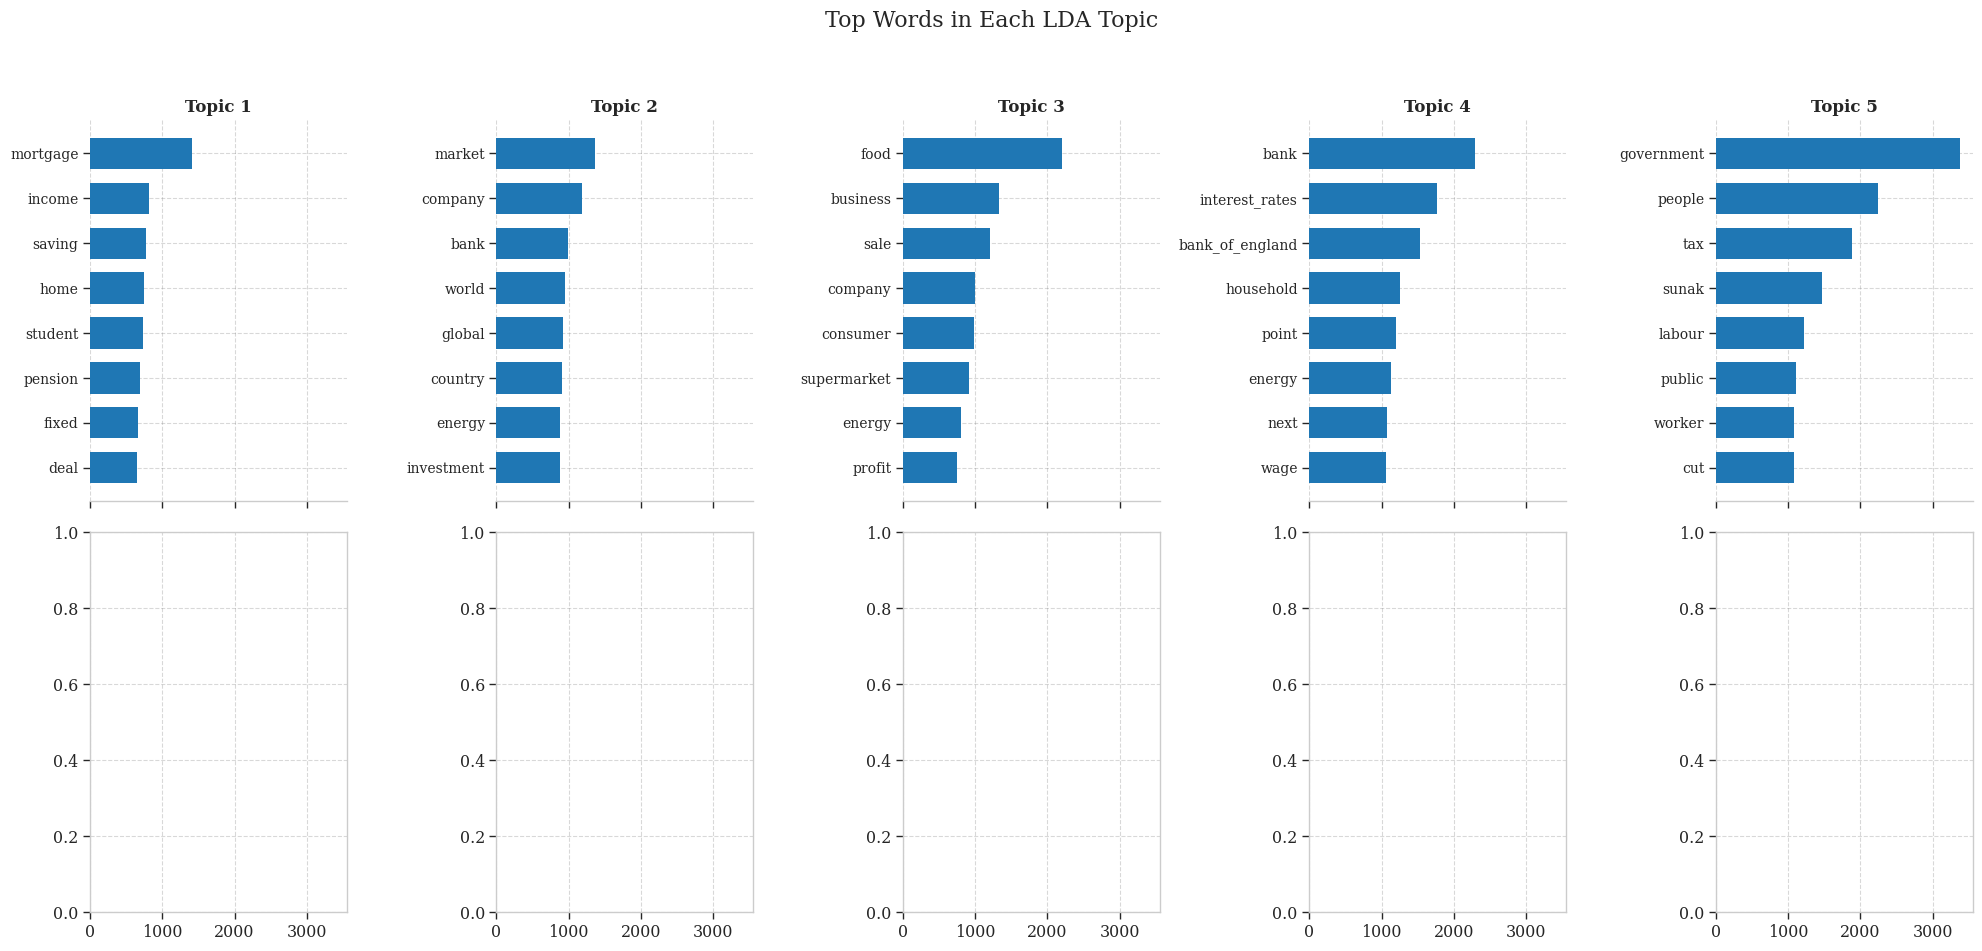

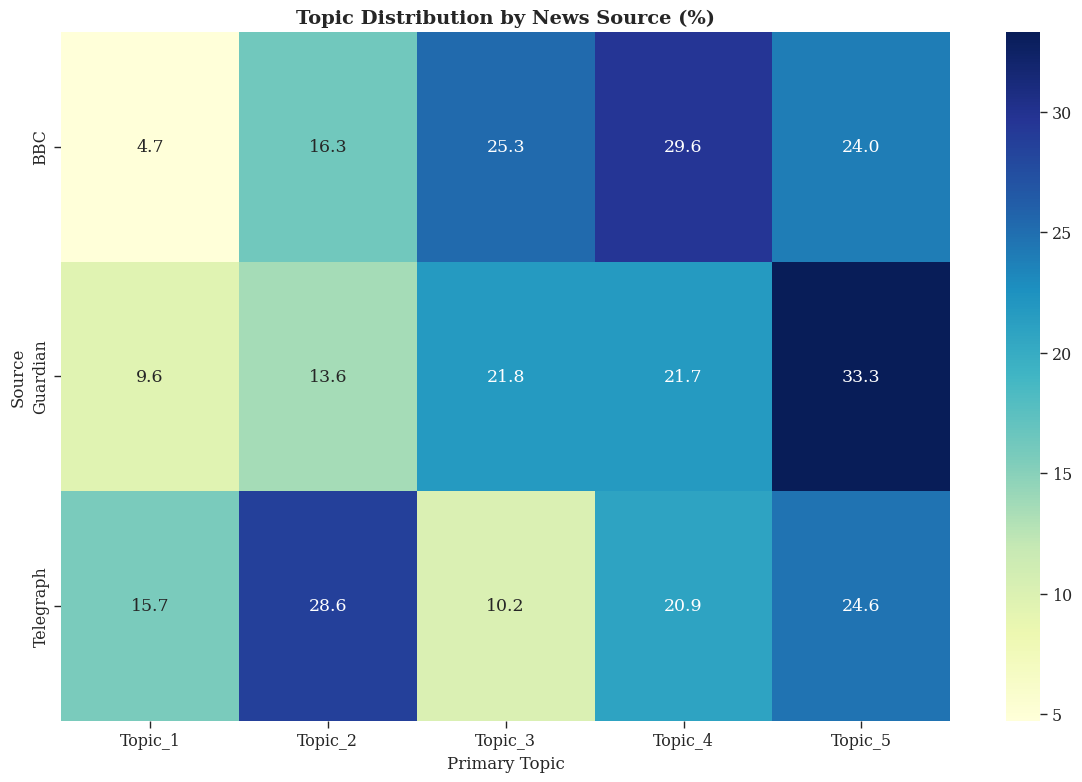

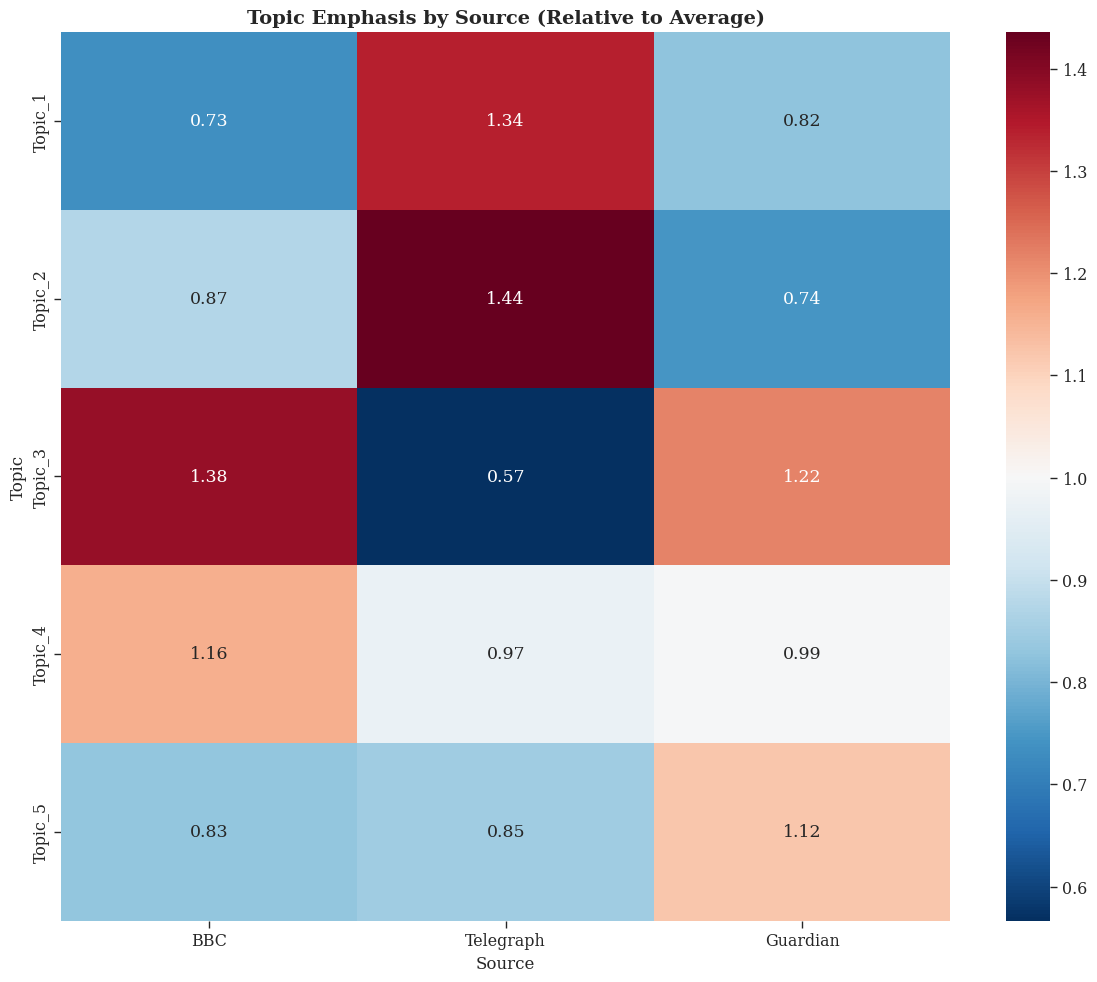

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.models.phrases import Phrases, Phraser
from tqdm.notebook import tqdm

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

# Define important phrases you want to preserve
IMPORTANT_PHRASES = [
    'cost of living', 'living crisis', 'cost of living crisis',
    'interest rates', 'interest rate', 'bank of england',
    'energy prices', 'food prices', 'supply chain',
    'monetary policy', 'fiscal policy', 'central bank',
    'prime minister', 'chancellor of the exchequer', 'mini budget',
    'energy cap', 'price cap', 'disposable income',
    'financial markets', 'stock market', 'labour market',
    'household income', 'wages growth', 'wage growth',
    'recession risk', 'economic growth', 'consumer spending',
    'inflation target', 'gas prices', 'oil prices',
    'ukraine war', 'russia ukraine', 'global inflation',
    'tax cuts', 'government spending', 'public sector',
    'mortgage rates', 'housing market', 'rental market'
]

# Text preprocessing including phrase detection
def preprocess_text_with_phrases(text):
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Replace important phrases with connected versions
    for phrase in IMPORTANT_PHRASES:
        connected_phrase = phrase.replace(' ', '_')
        text = text.replace(phrase, connected_phrase)
    
    # Remove punctuation while preserving the underscores in phrases
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    # Add specific individual stopwords for your domain
    custom_stopwords = {'inflation', 'price', 'prices', 'rate', 'rates', 'rise', 'rises', 
                      'rising', 'increase', 'increases', 'increasing', 'cost', 'costs',
                      'the', 'and', 'to', 'a', 'in', 'for', 'is', 'on', 'that', 'by', 'this',
                      'with', 'it', 'are', 'as', 'was', 'but', 'be', 'at', 'from', 'has', 'have',
                      'had', 'an', 'will', 'they', 'their', 'not', 'which', 'or', 'we', 'you', 
                      'one', 'all', 'would', 'there', 'been', 'if', 'more', 'when', 'who', 'what',
                      'also', 'said', 'its', 'into', 'than', 'other', 'can', 'only', 'about', 'may',
                      'some', 'could', 'should', 'his', 'her', 'our', 'up', 'were', 'out', 'then',
                      'time', 'them', 'just', 'such', 'how', 'these', 'any', 'two', 'per', 'cent',
                      'now', 'over', 'like', 'even', 'those', 'after', 'first', 'new', 'many',
                      'year', 'years', 'last', 'month', 'months', 'week', 'weeks', 'day', 'days',
                      'inflation', 'prices', 'high', 'low', 'rise', 'fall', 'increase', 'decrease', 
                      'rate', 'price', 'costs', 'pay', 'higher', 'while', 'she', 'since', 
                      'england', 'rises', 'down', 'rising', 'economy', 'says', 'figures', 
                      'much', 'expected', 'less', 'still', 'average', 'economics', 'economist', 'growth'}
    stop_words.update(custom_stopwords)
    
    # Tokenize and filter
    tokens = [word for word in text.split() if word not in stop_words and len(word) > 2]
    
    # Lemmatize words (but skip the connected_phrases)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for token in tokens:
        if '_' in token:  # This is a preserved phrase
            lemmatized_tokens.append(token)
        else:
            lemmatized_tokens.append(lemmatizer.lemmatize(token))
    
    return ' '.join(lemmatized_tokens)

# Apply preprocessing to each article
print("Preprocessing articles for topic modeling...")
df['processed_text'] = df['Article_Text'].apply(preprocess_text_with_phrases)

# Create a document-term matrix with bigram and trigram detection
print("Creating document-term matrix with phrase detection...")
# Add our preserved phrases as ngrams to be recognized by the vectorizer
ngram_range = (1, 3)  # Include unigrams, bigrams, and trigrams
vectorizer = CountVectorizer(
    max_features=5000, 
    min_df=5, 
    max_df=0.9,
    ngram_range=ngram_range,
    token_pattern=r'(?u)\b[\w_]+\b'  # This pattern allows for underscore in tokens
)
dtm = vectorizer.fit_transform(df['processed_text'])
feature_names = vectorizer.get_feature_names_out()

# Check if our phrases were detected
phrase_features = [f for f in feature_names if '_' in f]
print(f"Number of phrases detected: {len(phrase_features)}")
print("Sample phrases:", phrase_features[:10] if phrase_features else "None found")

# Set number of topics
num_topics = 5  # Adjust based on your domain knowledge

# Build the LDA model
print(f"Building LDA model with {num_topics} topics...")
lda_model = LatentDirichletAllocation(
    n_components=num_topics, 
    random_state=42,
    max_iter=25, 
    learning_method='online',
    n_jobs=-1  # Use all available cores
)
lda_model.fit(dtm)

# Visualize top words for each topic
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharex=True)
    axes = axes.flatten()
    
    for topic_idx, topic in enumerate(model.components_):
        if topic_idx < 5:  # Only plot the first 5 topics
            top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
            top_features = [feature_names[i] for i in top_features_ind]
            weights = topic[top_features_ind]

            ax = axes[topic_idx]
            ax.barh(top_features, weights, height=0.7)
            ax.set_title(f'Topic {topic_idx+1}', fontdict={'fontsize': 12})
            ax.invert_yaxis()
            ax.tick_params(axis='both', which='major', labelsize=10)
            for i in 'top right left'.split():
                ax.spines[i].set_visible(False)
    
    fig.suptitle(title, fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('visualisations/lda_top_words.pdf', bbox_inches='tight')
    return fig

# Create topic visualization
topic_vis = plot_top_words(lda_model, feature_names, 8, 'Top Words in Each LDA Topic')

# Get topic keywords for each topic
topic_keywords = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_keywords_idx = topic.argsort()[:-11:-1]  # Get top 10 keywords
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    # Replace underscores with spaces for readability in the output
    readable_keywords = [kw.replace('_', ' ') for kw in top_keywords]
    topic_keywords.append(readable_keywords)
    print(f"Topic {topic_idx+1}: {', '.join(readable_keywords)}")

# Transform documents to get topic distributions
doc_topic_dist = lda_model.transform(dtm)

# Add topic distributions to dataframe
topic_names = [f"Topic_{i+1}" for i in range(num_topics)]
topic_df = pd.DataFrame(doc_topic_dist, columns=topic_names)
df_with_topics = pd.concat([df.reset_index(drop=True), topic_df], axis=1)

# Assign a primary topic to each document
df_with_topics['Primary_Topic'] = df_with_topics[topic_names].idxmax(axis=1)

# Analyze topic distribution by source
topic_by_source = pd.crosstab(
    df_with_topics['Source'], 
    df_with_topics['Primary_Topic'], 
    normalize='index'  # Normalize by row (source)
) * 100  # Convert to percentage

# Create a heatmap of topic distribution by source
plt.figure(figsize=(12, 8))
sns.heatmap(topic_by_source, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Topic Distribution by News Source (%)', fontsize=14)
plt.ylabel('Source', fontsize=12)
plt.xlabel('Primary Topic', fontsize=12)
plt.tight_layout()
plt.savefig('visualisations/topic_distribution_by_source.pdf', bbox_inches='tight')

# Save topic keywords (with spaces restored for readability)
topic_keywords_df = pd.DataFrame({
    'Topic': [f"Topic_{i+1}" for i in range(num_topics)],
    'Keywords': [', '.join(keywords) for keywords in topic_keywords]
})
topic_keywords_df.to_csv('topic_keywords.csv', index=False)

# Advanced analysis: Create a topic preference index
# This shows which topics each source emphasizes more than the average
topic_overall_dist = df_with_topics[topic_names].mean()
topic_preference = pd.DataFrame()

for source in df['Source'].unique():
    source_df = df_with_topics[df_with_topics['Source'] == source]
    source_topic_dist = source_df[topic_names].mean()
    
    # Calculate how much this source emphasizes each topic compared to overall average
    # Value > 1 means the source emphasizes this topic more than average
    source_preference = source_topic_dist / topic_overall_dist
    topic_preference[source] = source_preference

# Create a heatmap of topic preferences
plt.figure(figsize=(12, 10))
sns.heatmap(topic_preference, annot=True, cmap='RdBu_r', center=1.0, fmt='.2f')
plt.title('Topic Emphasis by Source (Relative to Average)', fontsize=14)
plt.ylabel('Topic', fontsize=12)
plt.xlabel('Source', fontsize=12)
plt.tight_layout()
plt.savefig('visualisations/topic_emphasis_by_source.pdf', bbox_inches='tight')

print("Topic modeling with phrase detection complete!")

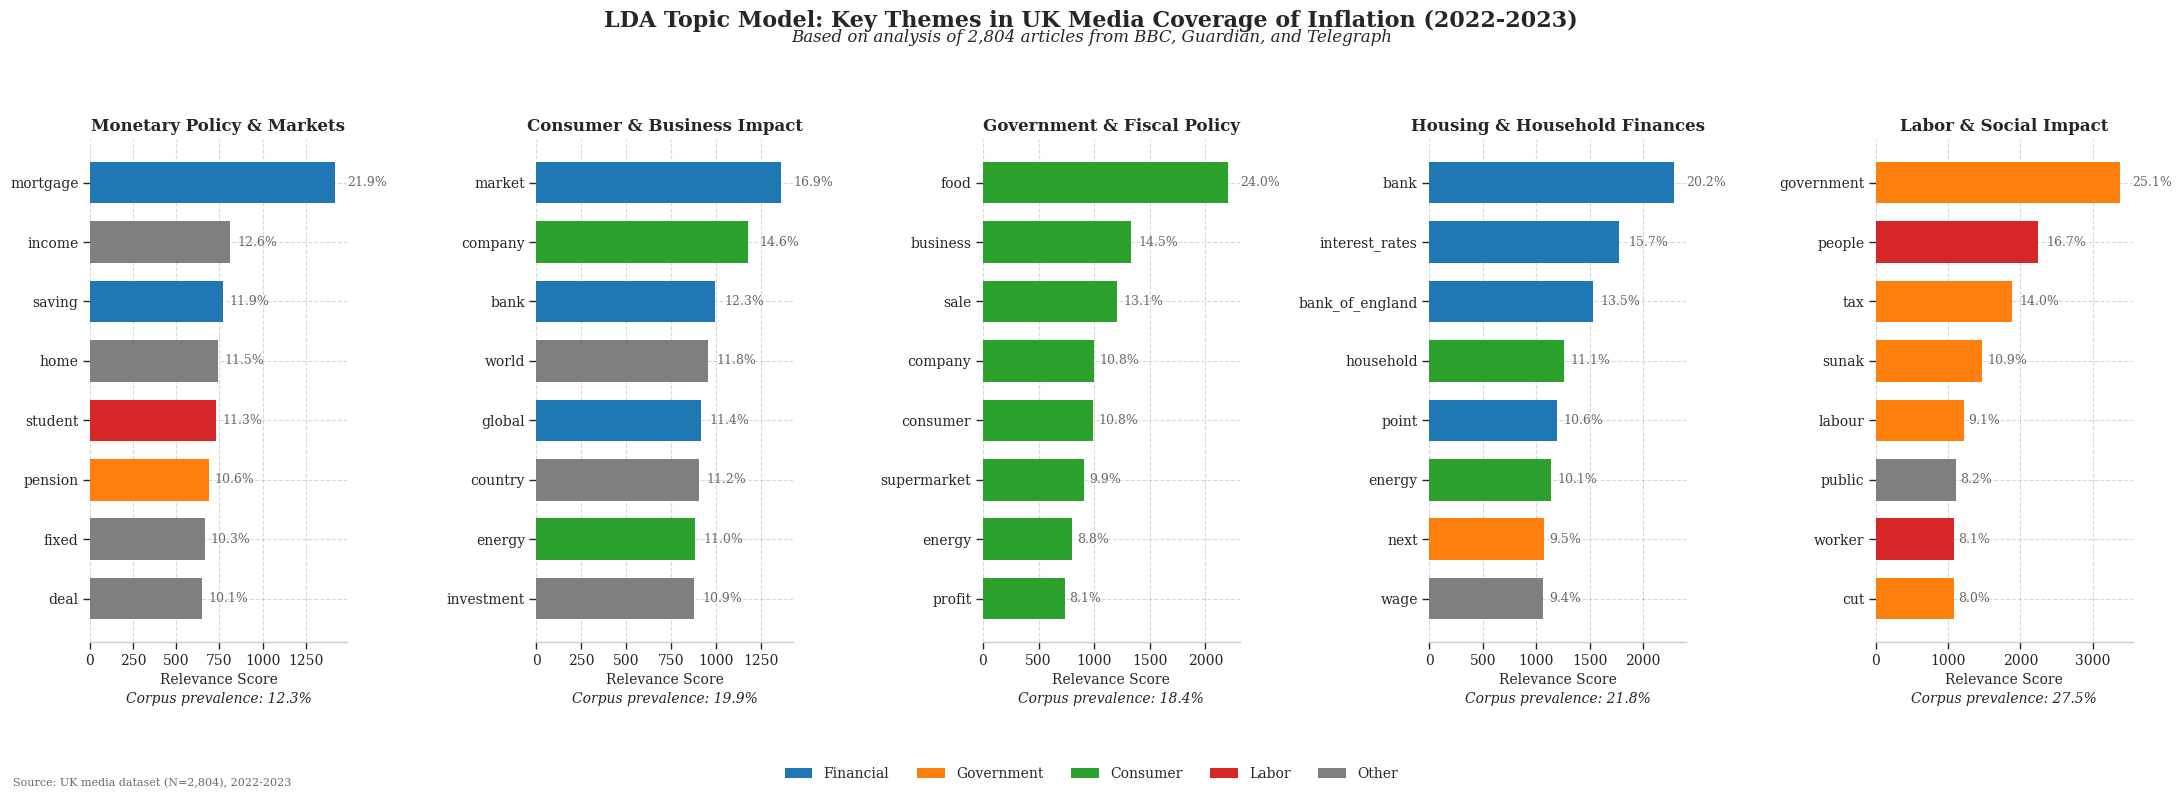

In [ ]:
def plot_improved_lda_topics(model, feature_names, n_top_words, title):
    # Define meaningful topic names
    topic_labels = {
        "Topic 1": "Monetary Policy & Markets",
        "Topic 2": "Consumer & Business Impact",
        "Topic 3": "Government & Fiscal Policy",
        "Topic 4": "Housing & Household Finances",
        "Topic 5": "Labor & Social Impact"
    }
    
    # Define word categories for color coding
    financial_terms = ['bank', 'interest_rates', 'market', 'mortgage', 'saving', 'economic',
                      'bank_of_england', 'global', 'recession', 'point', 'economist']
    government_terms = ['government', 'tax', 'sunak', 'chancellor', 'labour', 'tory',
                       'pension', 'next', 'cut']
    consumer_terms = ['food', 'energy', 'consumer', 'household', 'supermarket', 'company',
                     'business', 'sale', 'profit', 'customer', 'bill']
    labor_terms = ['worker', 'union', 'strike', 'work', 'people', 'service', 'student']
    
    # Function to get color based on word
    def get_word_color(word):
        if word in financial_terms:
            return '#1f77b4'  # Blue
        elif word in government_terms:
            return '#ff7f0e'  # Orange
        elif word in consumer_terms:
            return '#2ca02c'  # Green
        elif word in labor_terms:
            return '#d62728'  # Red
        else:
            return '#7f7f7f'  # Gray
    
    # Create figure with subplots
    fig, axes = plt.subplots(1, 5, figsize=(22, 8), sharex=False)
    axes = axes.flatten()
    
    # Set consistent style
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['axes.titleweight'] = 'bold'
    
    # Plot each topic
    for topic_idx, topic in enumerate(model.components_):
        if topic_idx < 5:  # Only process the first 5 topics
            ax = axes[topic_idx]
            
            # Get top words and weights
            top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
            top_features = [feature_names[i] for i in top_features_ind]
            weights = topic[top_features_ind]
            
            # Calculate percentage of total weight
            normalized_weights = weights / weights.sum() * 100
            
            # Plot horizontal bars with appropriate colors
            for i, (word, weight) in enumerate(zip(top_features, weights)):
                ax.barh(i, weight, height=0.7, color=get_word_color(word))
                # Add percentage label next to each bar
                ax.text(weight + weight*0.05, i, f"{normalized_weights[i]:.1f}%", 
                       va='center', fontsize=9, color='dimgray')
            
            # Set labels and titles
            ax.set_title(f"{topic_labels[f'Topic {topic_idx+1}']}", fontdict={'fontsize': 12})
            ax.invert_yaxis()
            ax.tick_params(axis='both', which='major', labelsize=10)
            
            # Remove top, right, and left spines
            for spine in ['top', 'right', 'left']:
                ax.spines[spine].set_visible(False)
            
            # Add y-tick labels (words)
            ax.set_yticks(range(len(top_features)))
            ax.set_yticklabels(top_features)
            
            # Set x-axis label
            ax.set_xlabel("Relevance Score", fontsize=10)
            
            # Add topic prevalence
            topic_prevalence = df_with_topics[f'Topic_{topic_idx+1}'].mean() * 100
            ax.text(0.5, -0.12, f"Corpus prevalence: {topic_prevalence:.1f}%", 
                   transform=ax.transAxes, ha='center', fontsize=10, fontstyle='italic')
    
    # Add legend for word categories
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#1f77b4', label='Financial'),
        Patch(facecolor='#ff7f0e', label='Government'),
        Patch(facecolor='#2ca02c', label='Consumer'),
        Patch(facecolor='#d62728', label='Labor'),
        Patch(facecolor='#7f7f7f', label='Other')
    ]
    fig.legend(handles=legend_elements, loc='upper center', 
              bbox_to_anchor=(0.5, 0.05), ncol=5, fontsize=10)
    
    # Add main title and subtitle
    fig.suptitle('LDA Topic Model: Key Themes in UK Media Coverage of Inflation (2022-2023)', 
                fontsize=16, fontweight='bold', y=0.98)
    fig.text(0.5, 0.94, 'Based on analysis of 2,804 articles from BBC, Guardian, and Telegraph', 
            ha='center', fontsize=12, style='italic')
    
    # Add source note
    fig.text(0.01, 0.01, 'Source: UK media dataset (N=2,804), 2022-2023', 
            fontsize=8, color='dimgray')
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.07, 1, 0.92])
    
    # Save figure
    plt.savefig('visualisations/improved_lda_topics.pdf', bbox_inches='tight', dpi=300)
    plt.savefig('visualisations/improved_lda_topics.png', bbox_inches='tight', dpi=300)
    
    return fig

# Call with your existing model and data
improved_vis = plot_improved_lda_topics(lda_model, feature_names, 8, 
                                       'Top Words in Each LDA Topic')

In [ ]:
# Save the topic keywords for reference
topic_keywords_df = pd.DataFrame({
    'Topic': [f"Topic_{i+1}" for i in range(num_topics)],
    'Keywords': [', '.join(keywords) for keywords in topic_keywords]
})
topic_keywords_df.to_csv('topic_keywords.csv', index=False)

print("Topic modeling and visualization complete!")

Topic modeling and visualization complete!


In [ ]:
# Chi-square test for independence between Source and Primary_Topic
from scipy.stats import chi2_contingency

# Create a contingency table (not normalized)
contingency_table = pd.crosstab(df_with_topics['Source'], df_with_topics['Primary_Topic'])

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square test for Source vs Topic distribution:")
print(f"Chi-square value: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Significant: {'Yes' if p < 0.05 else 'No'}")

Chi-square test for Source vs Topic distribution:
Chi-square value: 180.91
p-value: 0.0000
Degrees of freedom: 8
Significant: Yes



Topic_4 - Sentiment ANOVA:
F-statistic: 2.73, p-value: 0.0663

Topic_2 - Sentiment ANOVA:
F-statistic: 1.43, p-value: 0.2403

Topic_1 - Sentiment ANOVA:
F-statistic: 2.99, p-value: 0.0518

Topic_3 - Sentiment ANOVA:
F-statistic: 2.77, p-value: 0.0638

Topic_5 - Sentiment ANOVA:
F-statistic: 5.04, p-value: 0.0067
Significant differences in how sources frame this topic emotionally


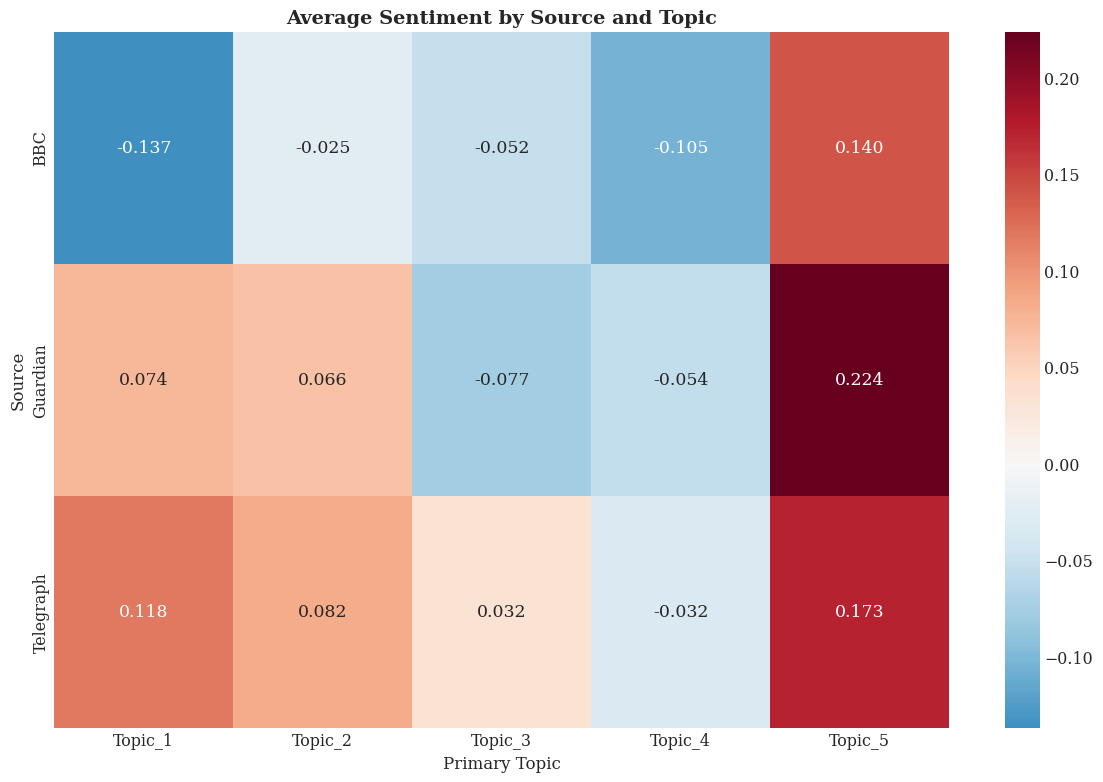

In [ ]:
# Add the sentiment column to your df_with_topics DataFrame
df_with_topics['Sentiment'] = df['finbert_compound']  # Assuming this column exists

# Create a matrix of average sentiment by source and topic
topic_sentiment = df_with_topics.groupby(['Source', 'Primary_Topic'])['Sentiment'].mean().unstack()

# Visualize this matrix
plt.figure(figsize=(12, 8))
sns.heatmap(topic_sentiment, annot=True, cmap='RdBu_r', center=0, fmt='.3f')
plt.title('Average Sentiment by Source and Topic', fontsize=14)
plt.ylabel('Source', fontsize=12)
plt.xlabel('Primary Topic', fontsize=12)
plt.tight_layout()
plt.savefig('visualisations/topic_sentiment_by_source.pdf', bbox_inches='tight')

# Statistical test of sentiment differences within each topic
for topic in df_with_topics['Primary_Topic'].unique():
    topic_data = df_with_topics[df_with_topics['Primary_Topic'] == topic]
    sources = topic_data['Source'].unique()
    
    sentiment_by_source = [topic_data[topic_data['Source'] == source]['Sentiment'] for source in sources]
    
    from scipy.stats import f_oneway
    f_stat, p_val = f_oneway(*sentiment_by_source)
    
    print(f"\n{topic} - Sentiment ANOVA:")
    print(f"F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")
    
    if p_val < 0.05:
        print("Significant differences in how sources frame this topic emotionally")

/var/folders/tz/m04h080x4rgdtp4hkk46mfq40000gn/T/ipykernel_3469/3214468577.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  topic_time_series = df_with_topics.groupby(['Source', pd.Grouper(key='Publication Date', freq='M')])


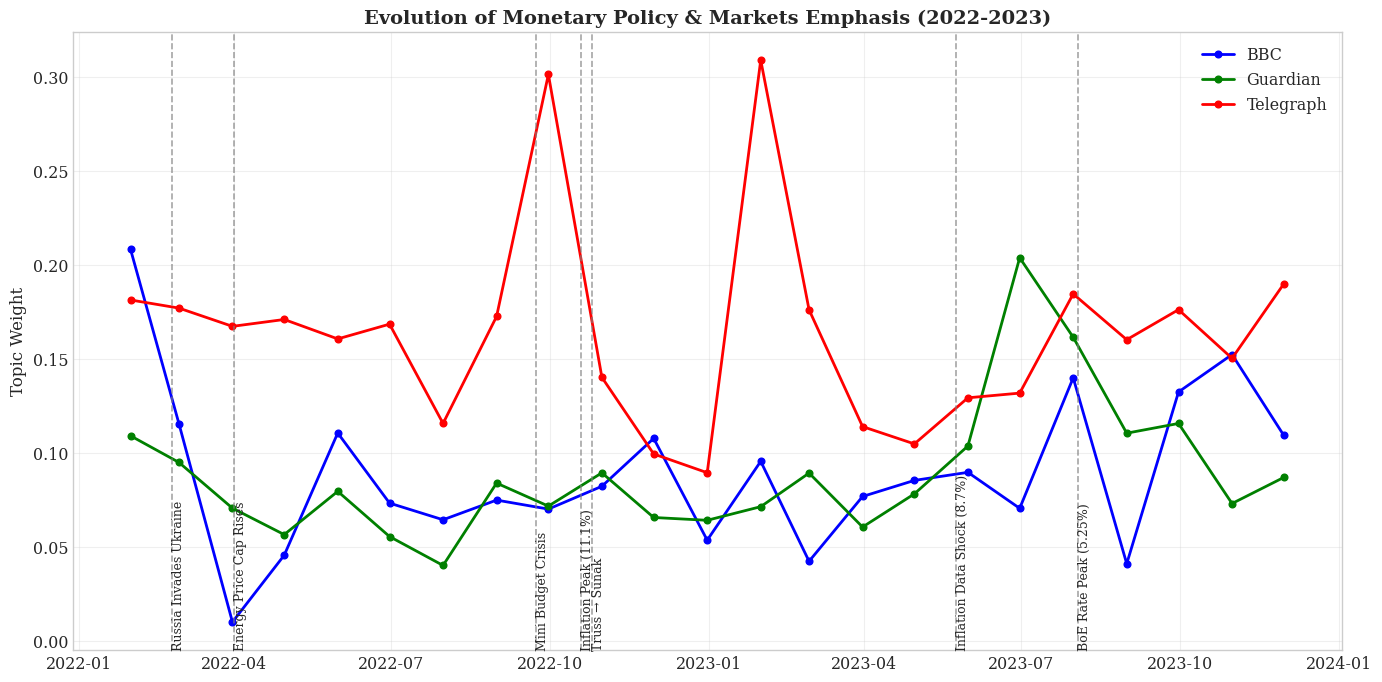

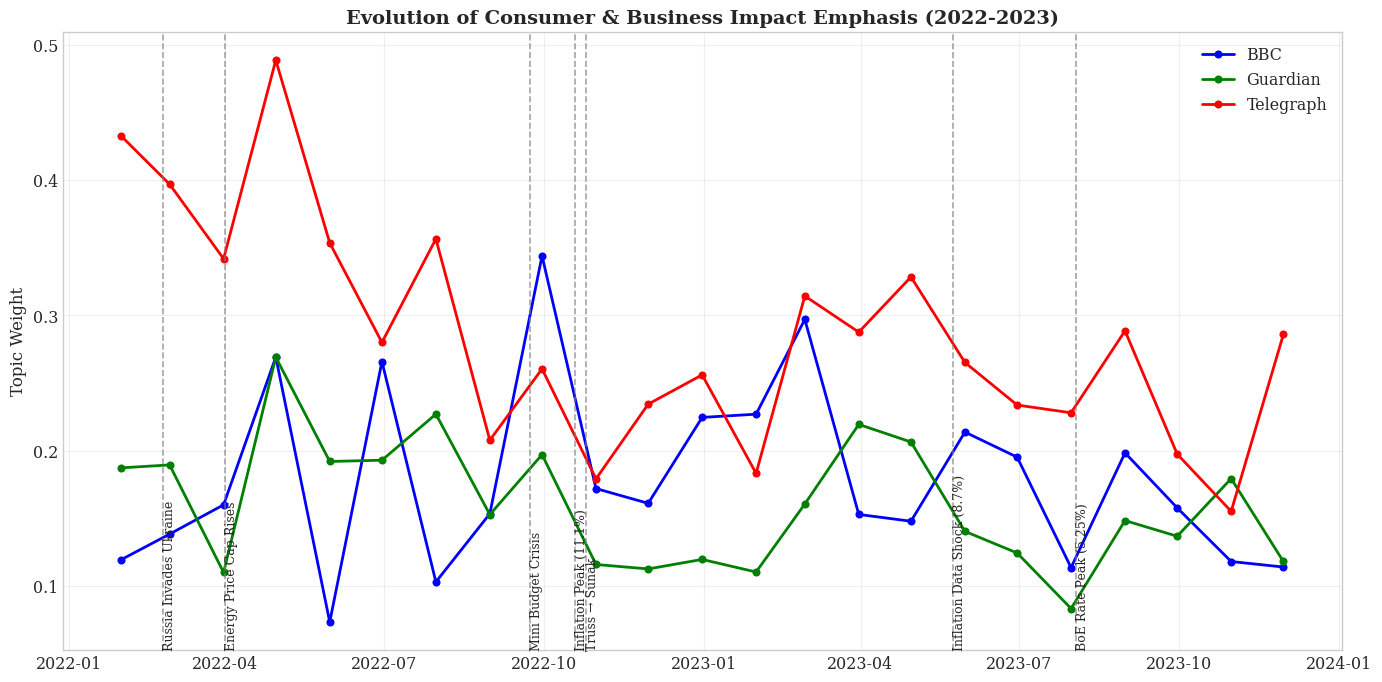

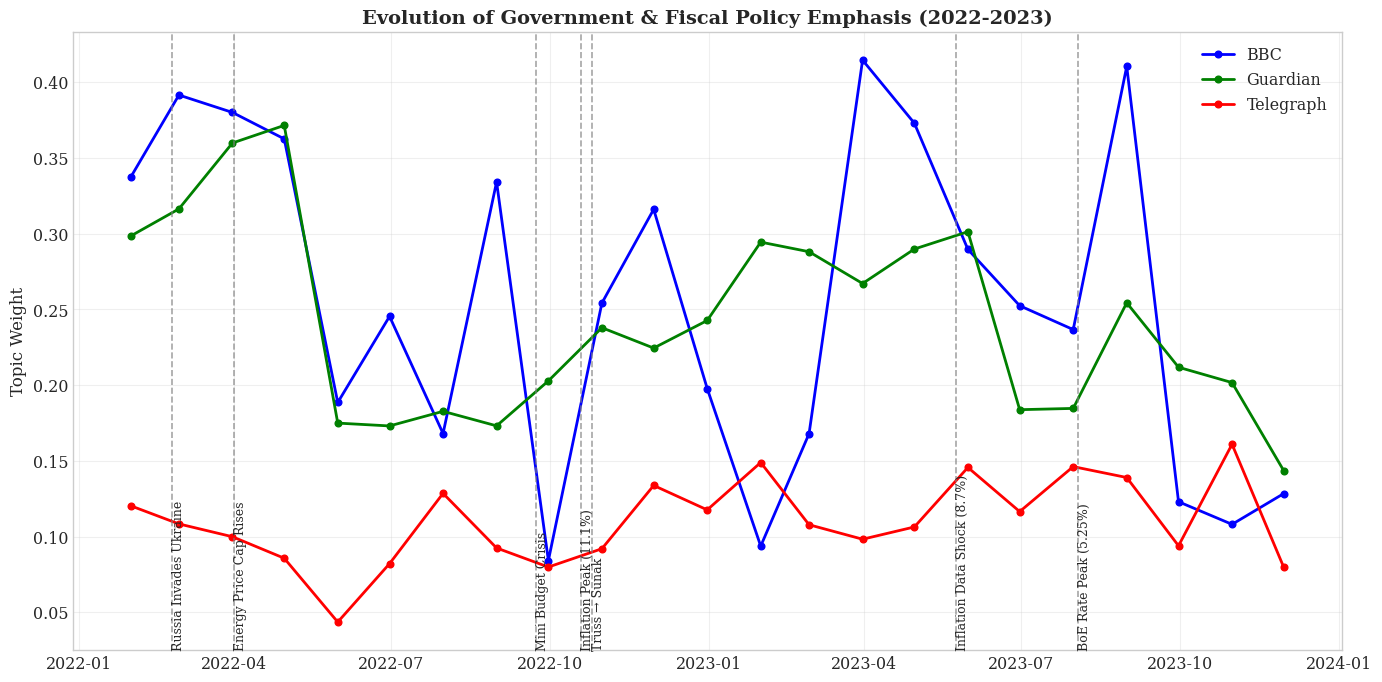

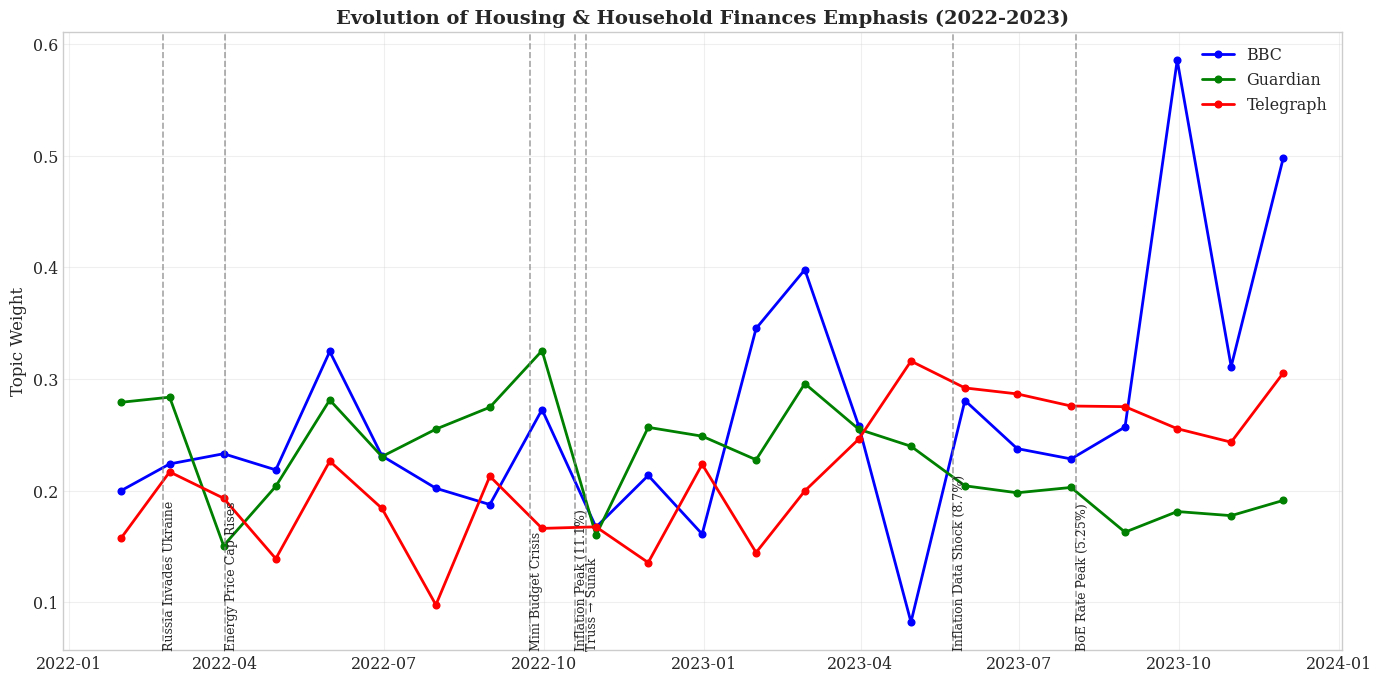

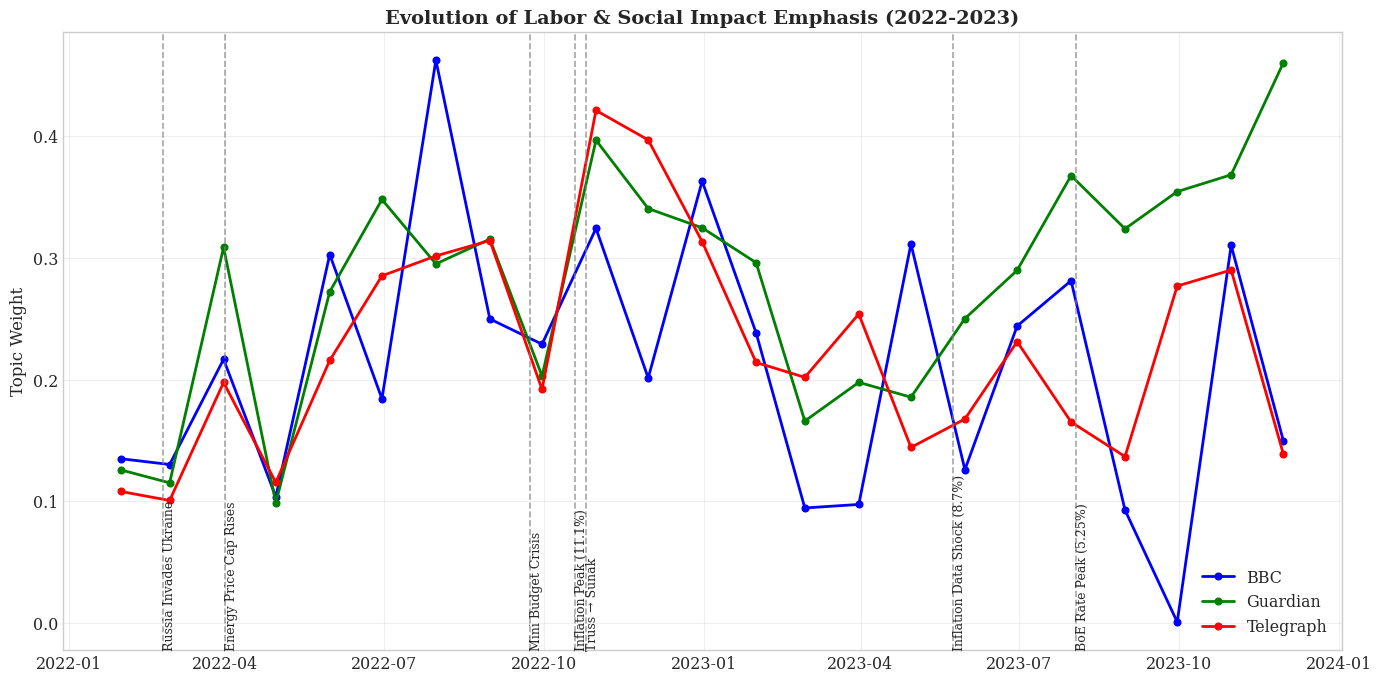

In [ ]:
# Ensure date is in datetime format
df_with_topics['Publication Date'] = pd.to_datetime(df_with_topics['Publication Date'])

# Create monthly time series of topic emphasis by source
topic_time_series = df_with_topics.groupby(['Source', pd.Grouper(key='Publication Date', freq='M')])
topic_evolution = topic_time_series[topic_names].mean().reset_index()

# Plot evolution of each topic by source
def plot_topic_evolution(topic_col, topic_label):
    plt.figure(figsize=(14, 7))
    
    for source, color in zip(['BBC', 'Guardian', 'Telegraph'], ['blue', 'green', 'red']):
        source_data = topic_evolution[topic_evolution['Source'] == source]
        plt.plot(source_data['Publication Date'], source_data[topic_col], 
                 marker='o', label=source, color=color, linewidth=2)
    
    # Add key events as vertical lines
    key_events = {
        '2022-02-24': 'Russia Invades Ukraine',
        '2022-04-01': 'Energy Price Cap Rises',
        '2022-09-23': 'Mini Budget Crisis',
        '2022-10-25': 'Truss → Sunak',
        '2022-10-19': 'Inflation Peak (11.1%)',
        '2023-05-24': 'Inflation Data Shock (8.7%)',
        '2023-08-03': 'BoE Rate Peak (5.25%)'
    }
    
    for date, event in key_events.items():
        plt.axvline(x=pd.to_datetime(date), color='gray', linestyle='--', alpha=0.7)
        plt.text(pd.to_datetime(date), plt.ylim()[0], event, rotation=90, 
                 fontsize=9, verticalalignment='bottom')
    
    plt.title(f'Evolution of {topic_label} Emphasis (2022-2023)', fontsize=14)
    plt.ylabel('Topic Weight', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'visualisations/topic_evolution_{topic_col}.pdf', bbox_inches='tight')
    
# Plot evolution for each topic
topic_labels = {
    "Topic_1": "Monetary Policy & Markets",
    "Topic_2": "Consumer & Business Impact",
    "Topic_3": "Government & Fiscal Policy",
    "Topic_4": "Housing & Household Finances",
    "Topic_5": "Labor & Social Impact"
}

for topic_col, topic_label in topic_labels.items():
    plot_topic_evolution(topic_col, topic_label)

In [ ]:
# H1: Guardian's focus on social impact (Topics 2 and 5)
social_impact_topics = ['Topic_2', 'Topic_5']  # Consumer impact and Labor impact
guardian_social_focus = df_with_topics[df_with_topics['Source'] == 'Guardian'][social_impact_topics].mean().sum()
other_social_focus = df_with_topics[df_with_topics['Source'] != 'Guardian'][social_impact_topics].mean().sum()

print(f"\nH1 Testing - Guardian Social Impact Focus:")
print(f"Guardian emphasis on social impact topics: {guardian_social_focus:.4f}")
print(f"Other sources emphasis on social impact topics: {other_social_focus:.4f}")
print(f"Difference: {guardian_social_focus - other_social_focus:.4f}")

# H2: Telegraph's focus on financial markets (Topics 1 and 4)
financial_topics = ['Topic_1', 'Topic_4']  # Monetary policy and Housing/Finance
telegraph_financial_focus = df_with_topics[df_with_topics['Source'] == 'Telegraph'][financial_topics].mean().sum()
other_financial_focus = df_with_topics[df_with_topics['Source'] != 'Telegraph'][financial_topics].mean().sum()

print(f"\nH2 Testing - Telegraph Financial Focus:")
print(f"Telegraph emphasis on financial topics: {telegraph_financial_focus:.4f}")
print(f"Other sources emphasis on financial topics: {other_financial_focus:.4f}")
print(f"Difference: {telegraph_financial_focus - other_financial_focus:.4f}")

# H3: BBC's balanced coverage (using standard deviation of topic weights)
bbc_topic_std = df_with_topics[df_with_topics['Source'] == 'BBC'][topic_names].std(axis=1).mean()
guardian_topic_std = df_with_topics[df_with_topics['Source'] == 'Guardian'][topic_names].std(axis=1).mean()
telegraph_topic_std = df_with_topics[df_with_topics['Source'] == 'Telegraph'][topic_names].std(axis=1).mean()

print(f"\nH3 Testing - BBC Balanced Coverage:")
print(f"BBC topic distribution std dev: {bbc_topic_std:.4f}")
print(f"Guardian topic distribution std dev: {guardian_topic_std:.4f}")
print(f"Telegraph topic distribution std dev: {telegraph_topic_std:.4f}")
print(f"BBC has {'most' if bbc_topic_std < min(guardian_topic_std, telegraph_topic_std) else 'not most'} balanced coverage")


H1 Testing - Guardian Social Impact Focus:
Guardian emphasis on social impact topics: 0.4573
Other sources emphasis on social impact topics: 0.4968
Difference: -0.0395

H2 Testing - Telegraph Financial Focus:
Telegraph emphasis on financial topics: 0.3768
Other sources emphasis on financial topics: 0.3215
Difference: 0.0553

H3 Testing - BBC Balanced Coverage:
BBC topic distribution std dev: 0.2703
Guardian topic distribution std dev: 0.3070
Telegraph topic distribution std dev: 0.2988
BBC has most balanced coverage


KeyError: 'Telegraph'

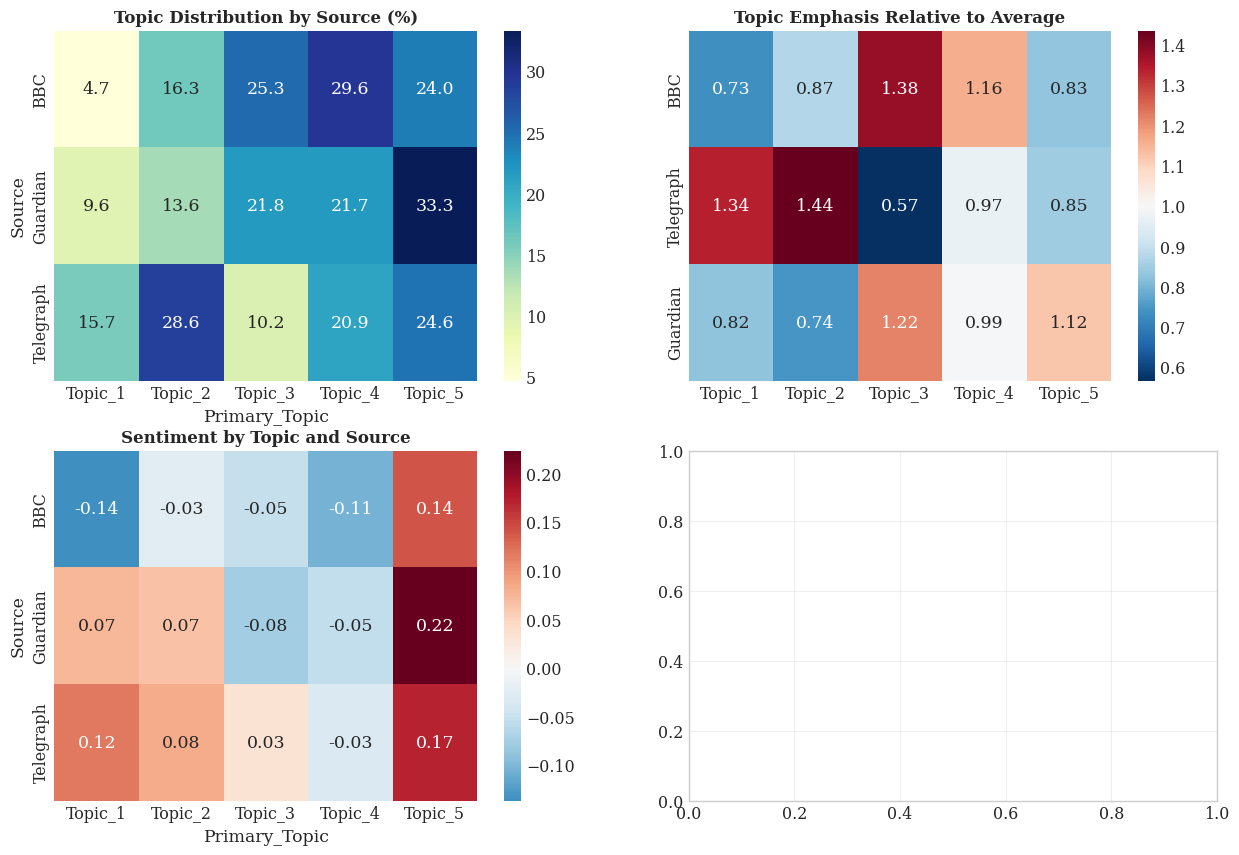

In [ ]:
# Create comprehensive figure for paper
plt.figure(figsize=(15, 10))

# 1. Topic Distribution by Source
plt.subplot(2, 2, 1)
sns.heatmap(topic_by_source, annot=True, cmap='YlGnBu', fmt='.1f', ax=plt.gca())
plt.title('Topic Distribution by Source (%)', fontsize=12)

# 2. Topic Emphasis Relative to Average
plt.subplot(2, 2, 2)
sns.heatmap(topic_preference.T, annot=True, cmap='RdBu_r', center=1.0, fmt='.2f', ax=plt.gca())
plt.title('Topic Emphasis Relative to Average', fontsize=12)

# 3. Topic-Sentiment Matrix
plt.subplot(2, 2, 3)
sns.heatmap(topic_sentiment, annot=True, cmap='RdBu_r', center=0, fmt='.2f', ax=plt.gca())
plt.title('Sentiment by Topic and Source', fontsize=12)

# 4. Most Distinctive Topic Over Time
most_distinctive_topic = topic_preference.std().idxmax()  # Topic with highest variance in emphasis
plt.subplot(2, 2, 4)

for source, color in zip(['BBC', 'Guardian', 'Telegraph'], ['blue', 'green', 'red']):
    source_data = topic_evolution[topic_evolution['Source'] == source]
    plt.plot(source_data['Publication Date'], source_data[most_distinctive_topic], 
             marker='o', label=source, color=color, linewidth=2)

plt.title(f'Evolution of {topic_labels[most_distinctive_topic]}', fontsize=12)
plt.legend()

# Main title
plt.suptitle('Topic Framing Differences in UK Media Coverage of Inflation (2022-2023)', 
            fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('visualisations/topic_framing_synthesis.pdf', bbox_inches='tight')